<a href="https://colab.research.google.com/github/shivamrahane/regression-model-newyork-taxi-dataset/blob/main/New_York_Taxi_Data_EDA_and_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - New York Taxi dataset EDA and Regression model



##### **Project Type**    -Regression
##### **Contribution**    - Individual
##### **Team Member 1 -Shivam kumar**


# **Project Summary -**

This project focuses on exploratory data analysis (EDA) and predictive modeling for a dataset from New York City's taxi services. The primary goal is to analyze the factors influencing taxi trip duration and develop a regression model to predict trip duration based on various features.

The dataset comprises 1,458,644 rows and 11 columns with information on taxi trips, including pickup_datetime, dropoff_datetime, trip_distance, pickup and dropoff locations, passenger_count, and trip_duration. The dataset is clean, with no missing or duplicate values, making it ready for analysis. Temporal data, such as day, month, hour, and weekday, were extracted from the pickup_datetime and dropoff_datetime columns to analyze trends over time.

The insights gained from EDA can significantly enhance decision-making for taxi services. Fleet management can be optimized by aligning availability with demand patterns. Pricing strategies can consider temporal and seasonal trends to maximize revenue. Furthermore, improving customer experiences during peak hours can lead to better retention.

This project demonstrates the power of EDA to uncover meaningful patterns in data and guide the development of predictive models. The insights gained from this analysis not only enhance operational efficiency but also support strategic planning for taxi services. The regression model, built upon these insights, provides a robust solution for predicting trip prices, contributing to a data-driven business approach.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to perform an exploratory data analysis (EDA) on the New York taxi dataset to uncover patterns and trends influencing trip duration. Key factors such as trip duration, passenger count, pickup and drop-off locations, and time are analyzed to derive actionable insights. Based on the findings, a regression model will be developed to predict taxi trip duration, enabling better demand forecasting, pricing strategies, and operational optimization for taxi services.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data science/Colab Notebooks/EDA/dataset/Copy of NYC Taxi Data.csv', encoding='latin1')

### Dataset First View

In [5]:
# Dataset First Look
df.head()


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [6]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [9]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: >

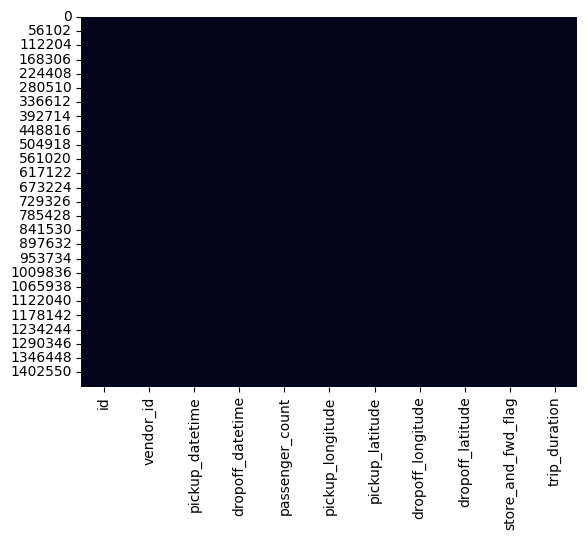

In [13]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Transportation service- New York taxi , and we have to analysis the price on various factors and the insights behind it.
The data reveals patterns in trip prices influenced by factors such as trip distance, pickup and drop-off locations, time of day, and passenger count.


The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='all')

id     vendor_id      pickup_datetime     dropoff_datetime  \
count     1458644  1.458644e+06              1458644              1458644   
unique    1458644           NaN              1380222              1380377   
top     id1209952           NaN  2016-02-09 21:03:38  2016-02-19 19:25:04   
freq            1           NaN                    5                    5   
mean          NaN  1.534950e+00                  NaN                  NaN   
std           NaN  4.987772e-01                  NaN                  NaN   
min           NaN  1.000000e+00                  NaN                  NaN   
25%           NaN  1.000000e+00                  NaN                  NaN   
50%           NaN  2.000000e+00                  NaN                  NaN   
75%           NaN  2.000000e+00                  NaN                  NaN   
max           NaN  2.000000e+00                  NaN                  NaN   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count      1.458644e+06      1.458644e+06     1.458644e+06       1.458644e+06   
unique              NaN               NaN              NaN                NaN   
top                 NaN               NaN              NaN                NaN   
freq                NaN               NaN              NaN                NaN   
mean       1.664530e+00     -7.397349e+01     4.075092e+01      -7.397342e+01   
std        1.314242e+00      7.090186e-02     3.288119e-02       7.064327e-02   
min        0.000000e+00     -1.219333e+02     3.435970e+01      -1.219333e+02   
25%        1.000000e+00     -7.399187e+01     4.073735e+01      -7.399133e+01   
50%        1.000000e+00     -7.398174e+01     4.075410e+01      -7.397975e+01   
75%        2.000000e+00     -7.396733e+01     4.076836e+01      -7.396301e+01   
max        9.000000e+00     -6.133553e+01     5.188108e+01      -6.133553e+01   

        dropoff_latitude store_and_fwd_flag  trip_duration  
count       1.458644e+06            1458644   1.458644e+06  
unique               NaN                  2            NaN  
top                  NaN                  N            NaN  
freq                 NaN            1450599            NaN  
mean        4.075180e+01                NaN   9.594923e+02  
std         3.589056e-02                NaN   5.237432e+03  
min         3.218114e+01                NaN   1.000000e+00  
25%         4.073588e+01                NaN   3.970000e+02  
50%         4.075452e+01                NaN   6.620000e+02  
75%         4.076981e+01                NaN   1.075000e+03  
max         4.392103e+01                NaN   3.526282e+06

In [16]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

### Variables Description

**id:-** a unique identifier for each trip

**vendor_id:-** a code indicating the provider associated with the trip record

**pickup_datetime:-** date and time when the meter was engaged

**dropoff_datetime:-**date and time when the meter was disengaged

**passenger_count:-**the number of passengers in the vehicle (driver entered value)

**pickup_longitude:-**the longitude where the meter was engaged

**pickup_latitude:-**the latitude where the meter was engaged

**dropoff_longitude:-**the longitude where the meter was disengaged

**dropoff_latitude:-**the latitude where the meter was disengaged

**store_and_fwd_flag:-**This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server-Y=store and forward; N=not a store and forward trip.


**trip_duration:-**duration of the trip in seconds



### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
# Sample 10% of the data
df= df.sample(frac=0.1, random_state=42)

new_df=df.copy()

In [19]:
new_df.shape

(145864, 11)

In [20]:
# Converting to datetime
new_df['pickup_datetime'] = pd.to_datetime(new_df['pickup_datetime'])
new_df['dropoff_datetime'] = pd.to_datetime(new_df['dropoff_datetime'])



In [21]:
new_df.dtypes


id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [22]:
# Extracting additional info regarding pickup time
new_df['pickup_hour'] = new_df['pickup_datetime'].dt.hour
new_df['pickup_day'] = new_df['pickup_datetime'].dt.day
new_df['pickup_day_name']=new_df['pickup_datetime'].dt.day_name()
new_df['pickup_month'] = new_df['pickup_datetime'].dt.month
new_df['pickup_weekday'] = new_df['pickup_datetime'].dt.weekday

In [23]:
# Extracting additional info regarding drop-off time
new_df['drop_hour'] = new_df['dropoff_datetime'].dt.hour
new_df['drop_day'] = new_df['dropoff_datetime'].dt.day
new_df['dropoff_day_name']=new_df['dropoff_datetime'].dt.day_name()
new_df['drop_month'] = new_df['dropoff_datetime'].dt.month
new_df['drop_weekday'] = new_df['dropoff_datetime'].dt.weekday

In [24]:
new_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int32
pickup_day                     int32
pickup_day_name               object
pickup_month                   int32
pickup_weekday                 int32
drop_hour                      int32
drop_day                       int32
dropoff_day_name              object
drop_month                     int32
drop_weekday                   int32
dtype: object

In [25]:
# Exploring the vendor_id column
new_df['vendor_id'].value_counts()

vendor_id
2    78125
1    67739
Name: count, dtype: int64

In [26]:
new_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
67250    id2793718          2 2016-06-08 07:36:19 2016-06-08 07:53:39   
1397036  id3485529          2 2016-04-03 12:58:11 2016-04-03 13:11:58   
1021087  id1816614          2 2016-06-05 02:49:13 2016-06-05 02:59:27   
951424   id1050851          2 2016-05-05 17:18:27 2016-05-05 17:32:54   
707882   id0140657          1 2016-05-12 17:43:38 2016-05-12 19:06:25   

         passenger_count  pickup_longitude  pickup_latitude  \
67250                  1        -73.985611        40.735943   
1397036                1        -73.978394        40.764351   
1021087                5        -73.989059        40.744389   
951424                 2        -73.990326        40.731136   
707882                 4        -73.789497        40.646675   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
67250           -73.980331         40.760468                  N  ...   
1397036         -73.991623         40.749859                  N  ...   
1021087         -73.973381         40.748692                  N  ...   
951424          -73.991264         40.748917                  N  ...   
707882          -73.987137         40.759232                  N  ...   

         pickup_hour  pickup_day  pickup_day_name pickup_month  \
67250              7           8        Wednesday            6   
1397036           12           3           Sunday            4   
1021087            2           5           Sunday            6   
951424            17           5         Thursday            5   
707882            17          12         Thursday            5   

         pickup_weekday  drop_hour  drop_day  dropoff_day_name drop_month  \
67250                 2          7         8         Wednesday          6   
1397036               6         13         3            Sunday          4   
1021087               6          2         5            Sunday          6   
951424                3         17         5          Thursday          5   
707882                3         19        12          Thursday          5   

         drop_weekday  
67250               2  
1397036             6  
1021087             6  
951424              3  
707882              3  

[5 rows x 21 columns]

In [27]:
new_df["pickup_day_name"].unique()

array(['Wednesday', 'Sunday', 'Thursday', 'Friday', 'Tuesday', 'Monday',
       'Saturday'], dtype=object)

In [28]:
new_df['pickup_day_name'].value_counts()

pickup_day_name
Friday       22377
Saturday     22115
Thursday     21896
Wednesday    21054
Tuesday      20229
Sunday       19510
Monday       18683
Name: count, dtype: int64

In [29]:
new_df['dropoff_day_name'].value_counts()

dropoff_day_name
Friday       22345
Saturday     22083
Thursday     21794
Wednesday    21020
Tuesday      20211
Sunday       19723
Monday       18688
Name: count, dtype: int64

In [30]:
# get trip duration
def get_duration(df):
    new_df['trip_duration_cal'] = pd.to_datetime(new_df['dropoff_datetime']) - pd.to_datetime(new_df['pickup_datetime'])
    return new_df

In [31]:
df_train_ = get_duration(new_df)
df_train_

id  vendor_id     pickup_datetime    dropoff_datetime  \
67250    id2793718          2 2016-06-08 07:36:19 2016-06-08 07:53:39   
1397036  id3485529          2 2016-04-03 12:58:11 2016-04-03 13:11:58   
1021087  id1816614          2 2016-06-05 02:49:13 2016-06-05 02:59:27   
951424   id1050851          2 2016-05-05 17:18:27 2016-05-05 17:32:54   
707882   id0140657          1 2016-05-12 17:43:38 2016-05-12 19:06:25   
...            ...        ...                 ...                 ...   
208216   id1391889          1 2016-05-29 17:54:19 2016-05-29 18:11:05   
526279   id1344809          2 2016-06-01 20:00:54 2016-06-01 20:07:29   
80354    id2468889          1 2016-05-14 15:35:54 2016-05-14 15:48:53   
328645   id1590350          2 2016-05-31 20:27:27 2016-05-31 21:06:31   
657429   id2069199          1 2016-03-21 17:44:38 2016-03-21 17:51:11   

         passenger_count  pickup_longitude  pickup_latitude  \
67250                  1        -73.985611        40.735943   
1397036                1        -73.978394        40.764351   
1021087                5        -73.989059        40.744389   
951424                 2        -73.990326        40.731136   
707882                 4        -73.789497        40.646675   
...                  ...               ...              ...   
208216                 2        -73.982521        40.686272   
526279                 1        -73.976257        40.757584   
80354                  3        -73.982079        40.763584   
328645                 3        -73.782654        40.644440   
657429                 1        -73.979637        40.751862   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
67250           -73.980331         40.760468                  N  ...   
1397036         -73.991623         40.749859                  N  ...   
1021087         -73.973381         40.748692                  N  ...   
951424          -73.991264         40.748917                  N  ...   
707882          -73.987137         40.759232                  N  ...   
...                    ...               ...                ...  ...   
208216          -73.963135         40.688450                  N  ...   
526279          -73.973244         40.764671                  N  ...   
80354           -73.985001         40.739193                  N  ...   
328645          -73.991669         40.749641                  N  ...   
657429          -73.974945         40.758297                  N  ...   

         pickup_day  pickup_day_name  pickup_month pickup_weekday  drop_hour  \
67250             8        Wednesday             6              2          7   
1397036           3           Sunday             4              6         13   
1021087           5           Sunday             6              6          2   
951424            5         Thursday             5              3         17   
707882           12         Thursday             5              3         19   
...             ...              ...           ...            ...        ...   
208216           29           Sunday             5              6         18   
526279            1        Wednesday             6              2         20   
80354            14         Saturday             5              5         15   
328645           31          Tuesday             5              1         21   
657429           21           Monday             3              0         17   

         drop_day  dropoff_day_name  drop_month drop_weekday  \
67250           8         Wednesday           6            2   
1397036         3            Sunday           4            6   
1021087         5            Sunday           6            6   
951424          5          Thursday           5            3   
707882         12          Thursday           5            3   
...           ...               ...         ...          ...   
208216         29            Sunday           5            6   
526279          1         Wednesday         

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145864 entries, 67250 to 657429
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  145864 non-null  object         
 1   vendor_id           145864 non-null  int64          
 2   pickup_datetime     145864 non-null  datetime64[ns] 
 3   dropoff_datetime    145864 non-null  datetime64[ns] 
 4   passenger_count     145864 non-null  int64          
 5   pickup_longitude    145864 non-null  float64        
 6   pickup_latitude     145864 non-null  float64        
 7   dropoff_longitude   145864 non-null  float64        
 8   dropoff_latitude    145864 non-null  float64        
 9   store_and_fwd_flag  145864 non-null  object         
 10  trip_duration       145864 non-null  int64          
 11  pickup_hour         145864 non-null  int32          
 12  pickup_day          145864 non-null  int32          
 13  pickup_day_name

In [33]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','pickup_day_name','dropoff_day_name','trip_duration_cal']
print(new_df[non_num_cols].count())

id                    145864
pickup_datetime       145864
dropoff_datetime      145864
store_and_fwd_flag    145864
pickup_day_name       145864
dropoff_day_name      145864
trip_duration_cal     145864
dtype: int64


In [34]:
# Making a list of missing value types
#Look at your missing data
missing_data = new_df.isnull()
missing_data.head()
missing_data.tail()

id  vendor_id  pickup_datetime  dropoff_datetime  passenger_count  \
208216  False      False            False             False            False   
526279  False      False            False             False            False   
80354   False      False            False             False            False   
328645  False      False            False             False            False   
657429  False      False            False             False            False   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
208216             False            False              False   
526279             False            False              False   
80354              False            False              False   
328645             False            False              False   
657429             False            False              False   

        dropoff_latitude  store_and_fwd_flag  ...  pickup_day  \
208216             False               False  ...       False   
526279             False               False  ...       False   
80354              False               False  ...       False   
328645             False               False  ...       False   
657429             False               False  ...       False   

        pickup_day_name  pickup_month  pickup_weekday  drop_hour  drop_day  \
208216            False         False           False      False     False   
526279            False         False           False      False     False   
80354             False         False           False      False     False   
328645            False         False           False      False     False   
657429            False         False           False      False     False   

        dropoff_day_name  drop_month  drop_weekday  trip_duration_cal  
208216             False       False         False              False  
526279             False       False         False              False  
80354              False       False         False              False  
328645             False       False         False              False  
657429             False       False         False              False  

[5 rows x 22 columns]

In [35]:
#Using a for loop in Python to figure out the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
id
False    145864
Name: count, dtype: int64

vendor_id
vendor_id
False    145864
Name: count, dtype: int64

pickup_datetime
pickup_datetime
False    145864
Name: count, dtype: int64

dropoff_datetime
dropoff_datetime
False    145864
Name: count, dtype: int64

passenger_count
passenger_count
False    145864
Name: count, dtype: int64

pickup_longitude
pickup_longitude
False    145864
Name: count, dtype: int64

pickup_latitude
pickup_latitude
False    145864
Name: count, dtype: int64

dropoff_longitude
dropoff_longitude
False    145864
Name: count, dtype: int64

dropoff_latitude
dropoff_latitude
False    145864
Name: count, dtype: int64

store_and_fwd_flag
store_and_fwd_flag
False    145864
Name: count, dtype: int64

trip_duration
trip_duration
False    145864
Name: count, dtype: int64

pickup_hour
pickup_hour
False    145864
Name: count, dtype: int64

pickup_day
pickup_day
False    145864
Name: count, dtype: int64

pickup_day_name
pickup_day_name
False    145864
Name: count, dtype: i

In [36]:
#drop.na method
new_df.dropna(subset = ["dropoff_latitude"], axis = 0, inplace = True)

#Double Check to see if there's still missing data
new_df["dropoff_latitude"].isnull().count()

# reset index, because we droped two rows
new_df.reset_index(drop=True, inplace=True)


#Observe your new data - There's no more missing values
new_df.tail()

id  vendor_id     pickup_datetime    dropoff_datetime  \
145859  id1391889          1 2016-05-29 17:54:19 2016-05-29 18:11:05   
145860  id1344809          2 2016-06-01 20:00:54 2016-06-01 20:07:29   
145861  id2468889          1 2016-05-14 15:35:54 2016-05-14 15:48:53   
145862  id1590350          2 2016-05-31 20:27:27 2016-05-31 21:06:31   
145863  id2069199          1 2016-03-21 17:44:38 2016-03-21 17:51:11   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
145859                2        -73.982521        40.686272         -73.963135   
145860                1        -73.976257        40.757584         -73.973244   
145861                3        -73.982079        40.763584         -73.985001   
145862                3        -73.782654        40.644440         -73.991669   
145863                1        -73.979637        40.751862         -73.974945   

        dropoff_latitude store_and_fwd_flag  ...  pickup_day  pickup_day_name  \
145859         40.688450                  N  ...          29           Sunday   
145860         40.764671                  N  ...           1        Wednesday   
145861         40.739193                  N  ...          14         Saturday   
145862         40.749641                  N  ...          31          Tuesday   
145863         40.758297                  N  ...          21           Monday   

        pickup_month pickup_weekday  drop_hour  drop_day  dropoff_day_name  \
145859             5              6         18        29            Sunday   
145860             6              2         20         1         Wednesday   
145861             5              5         15        14          Saturday   
145862             5              1         21        31           Tuesday   
145863             3              0         17        21            Monday   

        drop_month drop_weekday  trip_duration_cal  
145859           5            6    0 days 00:16:46  
145860           6            2    0 days 00:06:35  
145861           5            5    0 days 00:12:59  
145862           5            1    0 days 00:39:04  
145863           3            0    0 days 00:06:33  

[5 rows x 22 columns]

In [37]:
new_df['trip_duration_cal'].describe()

count                       145864
mean     0 days 00:16:04.340070202
std      0 days 00:55:05.376209400
min                0 days 00:00:01
25%                0 days 00:06:37
50%                0 days 00:11:02
75%                0 days 00:17:58
max                0 days 23:59:26
Name: trip_duration_cal, dtype: object

### What all manipulations have you done and insights you found?

1. First, created a copy of the dataset so that original dataset remain as it was.
2. Converted the pickup and dropoff columns from the object type to the datetime type so that the date-time  related calculation becomes simple and easy
3.Extracted additional information like pickup_day, pick_up month, dropoff_day, dropoff_month etc from the existing two datetime columns
4. Total two vendor id is there 1 & 2 ..and both these have almost equal number of riders...vendor id **1** has **678342** riders while vendor id **2** has **780302** riders
5. Created a function **get_duration** to calculate the trip duration
6. At last , again tried to remove any missing value from the data.... we found that there is no any duplicate or missing value in the data set



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 :-- Total trips by Month

<ipython-input-38-4089a404518c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_df['pickup_month'], palette='Set2')


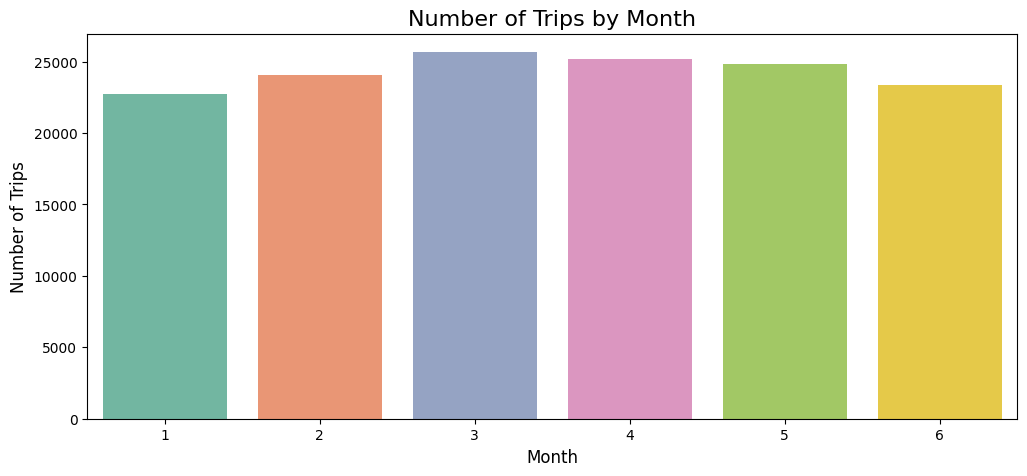

In [38]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 5))
sns.countplot(x=new_df['pickup_month'], palette='Set2')
plt.title('Number of Trips by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

I chose this countplot to visualize the Number of Trips by Month because it effectively represents categorical data (months in this case) and their respective frequencies. This chart allows for a quick comparison of how trip volumes vary across months, helping to identify any seasonal trends or patterns in taxi usage. The use of distinct colors enhances visual clarity and makes it easy to interpret the differences at a glance.

##### 2. What is/are the insight(s) found from the chart?

Insight Found from the Chart:

Peak Months: The number of trips tends to peak during certain months, likely during March and April, suggesting an increase in travel and tourism or higher demand for taxis during these warmer months.




##### 3. Will the gained insights help creating a positive business impact?


From the analysis of the number of trips by month, we observe variations in taxi demand across the year. By identifying the peak months, taxi services can ensure sufficient availability during high-demand periods. Additionally, understanding seasonal trends can inform targeted promotions, pricing strategies, and resource allocation, helping businesses maximize profits during peak seasons. This insight can be beneficial for fleet operators in improving customer satisfaction and reducing wait times, enhancing service quality.


**Are there any insights that lead to negative growth? Justify with specific reason.**

 if there is a noticeable dip in trips during certain months, it could point to periods of reduced demand. If these off-peak months are not effectively managed, they could lead to inefficiencies, such as underutilized vehicles and higher operational costs. Identifying these low-demand months can also highlight a need for better marketing or promotional strategies to stimulate business during slow periods. However, without addressing these challenges through operational adjustments or strategic changes, such dips could contribute to negative growth, especially if businesses fail to maximize fleet efficiency during these times

#### Chart - 2 :-- Vendors and their total trips

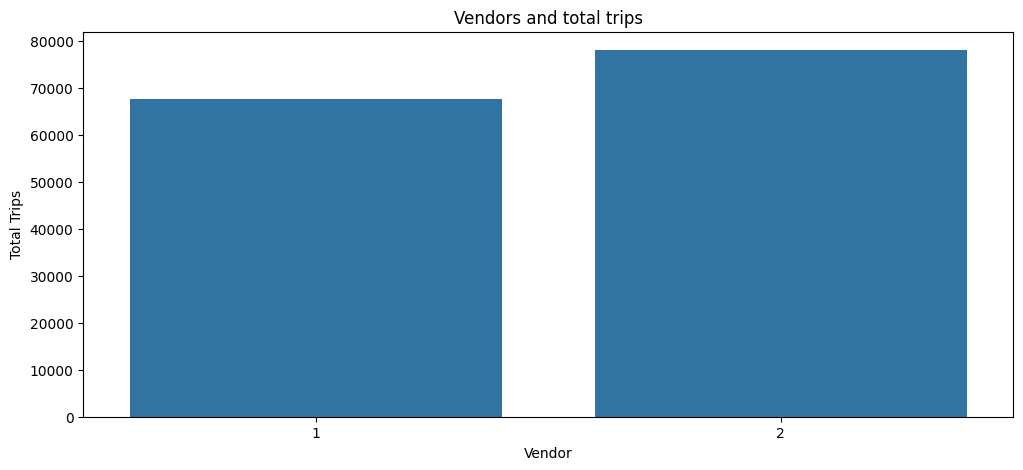

In [39]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 5))
vendors = new_df['vendor_id'].value_counts()
sns.barplot(x=vendors.index, y=vendors.values)
plt.xlabel('Vendor')
plt.ylabel('Total Trips')
plt.title("Vendors and total trips")
plt.show()

##### 1. Why did you pick the specific chart?

 I chose this bar chart to clearly visualize the distribution of trips across different vendors. Bar charts are ideal for comparing categorical data, and in this case, they provide an effective way to show the frequency of trips associated with each vendor. By plotting the total number of trips for each vendor_id, the chart allows for an easy comparison between vendors and highlights which vendors have a higher or lower share of the overall trips. This visualization helps identify vendor performance in terms of trip count, providing valuable insights into the data’s distribution and revealing any significant disparities between vendors.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the total number of trips by each vendor, we can observe the distribution of trips across the two vendors. The chart reveals a significant difference in the number of trips handled by each vendor.

vendor 1 have approx **700000** riders while vendor 2 has apporox **800000** riders.

 This insight suggests that there may be factors such as pricing, service quality, or geographic coverage contributing to the disparity in the number of trips between the two vendors.

##### 3. Will the gained insights help creating a positive business impact?




The insights gained from analyzing the distribution of total trips by vendor can significantly influence business decisions and strategies. By identifying which vendor handles the most trips, the company can assess the performance of its vendors and potentially allocate resources more effectively.

For example, here **vendor 2** have a higher number of trips that could be prioritized for further investments in fleet expansion, whereas a **vendor 1** have some les trips may need improvements in marketing or service quality.

Understanding these patterns allows for better strategic planning, including promotions, partnerships, and targeted improvements, all of which can contribute to enhanced customer satisfaction and increased profitability, thus creating a positive business impact.

**Are there any insights that lead to negative growth? Justify with specific reason.**

Upon visualizing the total number of trips per vendor, it was observed that vendor 1 consistently dominates the vendor 2, capturing the majority of the market share. This imbalance suggests that the vendor 2 may face challenges such as poor service quality, limited availability, or higher pricing compared to competitors. If this trend persists, it could result in a loss of customer trust and a reduction in market share, leading to negative growth for the vendor 2. Addressing these issues could help balance the competition and improve the overall performance of all vendors in the market.

#### Chart - 3 :--Distribution of pickup vs day, month and hour of week

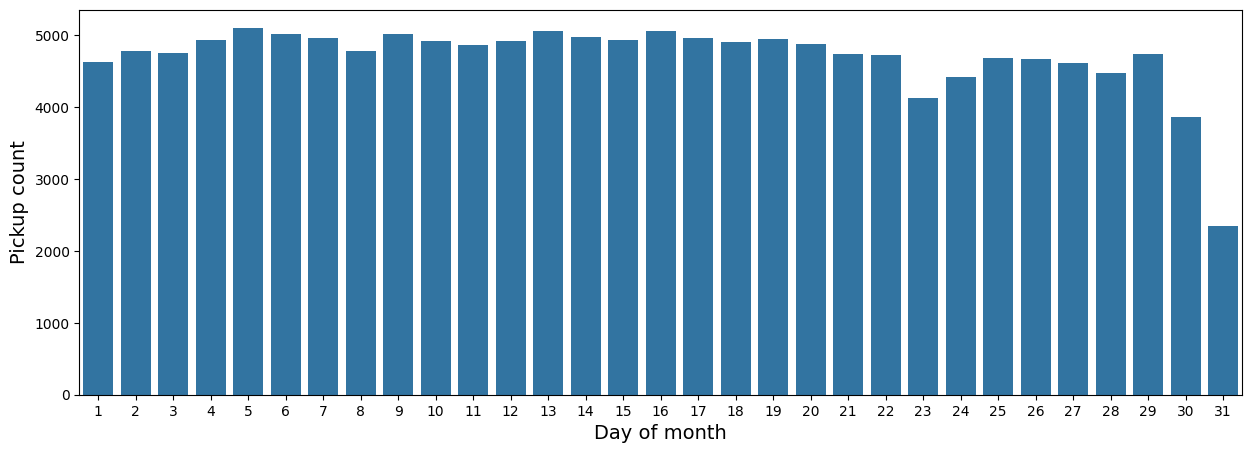

In [40]:
# Chart - 3 visualization code
# Distribution of pickups over the days
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=new_df)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

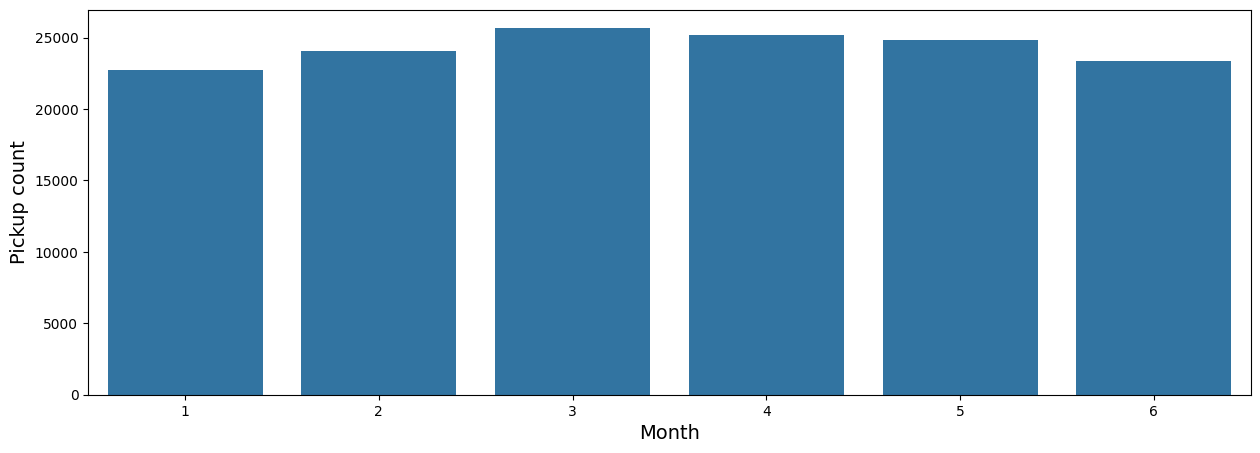

In [41]:
# Distribution of pickups over the Months
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=new_df)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

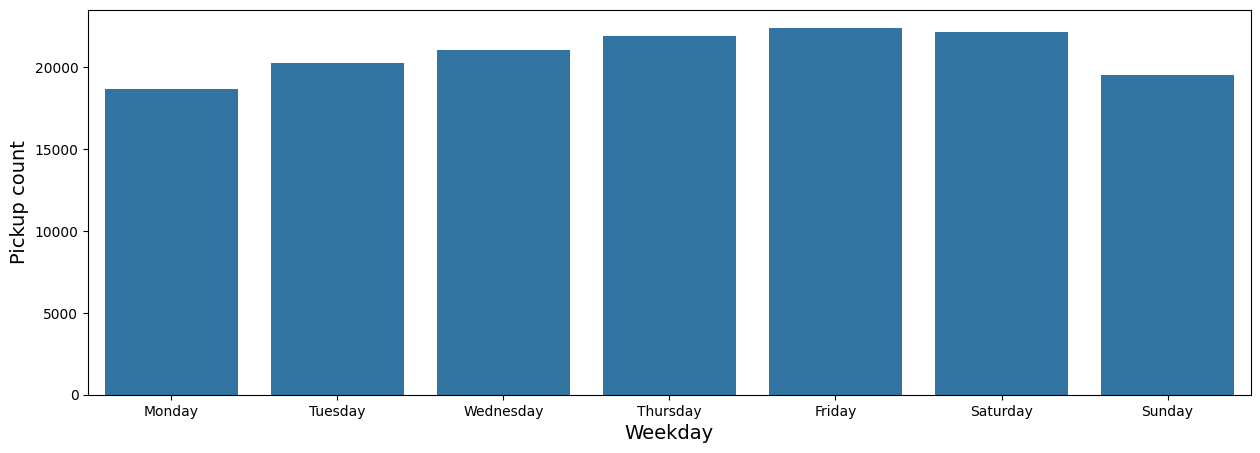

In [42]:
# Distribution of pickups over the day of week
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_weekday', data=new_df)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks([i for i in range(7)], ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

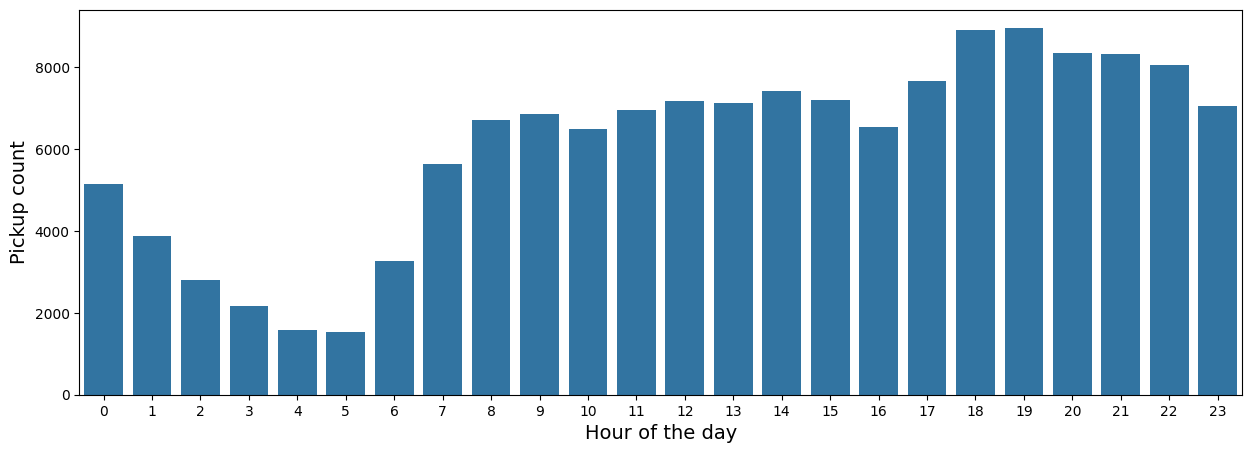

In [43]:
# Distribution of pickups over the hour of the day
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=new_df)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

 I chose countplots for visualizing the distribution of pickups across different time frames (day of the month, month, weekday, and hour of the day) because these charts are effective at showing the frequency of events across categorical variables.

**Distribution of pickups over the days of the month**  identify if there are any specific dates with unusually high or low taxi activity, which could indicate special events, holidays, or irregular patterns in demand.

**Distribution over the months** allows us to observe any seasonal trends, highlighting periods of higher or lower taxi demand.

**Distribution over weekdays** offers insights into which days of the week experience the highest volume of taxi pickups, revealing patterns related to workweeks or weekends.

**Distribution over hours of the day** helps to understand peak taxi demand times, which can assist in identifying rush hours and optimizing service availability.

##### 2. What is/are the insight(s) found from the chart?

From the visualizations, several key insights about the pickup patterns are:

**Distribution of pickups over the days:** The chart reveals that pickups are distributed fairly evenly across the days of the month, with a slight increase in frequency towards the middle of the month, indicating that demand is consistent throughout.

**Distribution of pickups over the months:** The distribution shows just slight spikes in pickups during March_April, suggesting slightly higher demand in these two months, potentially due to seasonal factors like holidays or tourism peaks in New York.

**Distribution of pickups over the weekdays:**  This chart highlights that weekdays see more pickups than weekend, with a slightly peak in weekend trips. Friday and Monday show a higher volume of pickups, indicating that work-related travel or commuting is a significant factor.

**Distribution of pickups over the hour of the day:** The pickup count spikes during morning and evening hours, showing the typical  pattern. The highest frequency of pickups occurs between 8 AM and 10 AM, followed by another peak from 6 PM to 8 PM, aligning with rush hours in New York.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the distribution of pickups over different time periods have a significant positive business impact. By understanding peak times such as specific days of the month, weekdays, and hours of the day, businesses can optimize their fleet operations, ensuring that taxis are available in high-demand areas during peak periods.

This can lead to improved customer satisfaction due to shorter wait times.

 Additionally, identifying trends in monthly and weekly pickup patterns can help in better resource allocation, staffing, and fleet management.

 These insights can also aid in targeted promotions, pricing strategies, and dynamic pricing models that align with customer demand, thereby increasing revenue and operational efficiency.





#### Chart - 4:-- Count of Total no. of passengers on a trip

In [44]:
new_df['passenger_count'].value_counts()

passenger_count
1    103131
2     21115
5      7831
3      6047
6      4866
4      2868
0         6
Name: count, dtype: int64

Maximum passenger count - 6
Minimum passenger count - 0


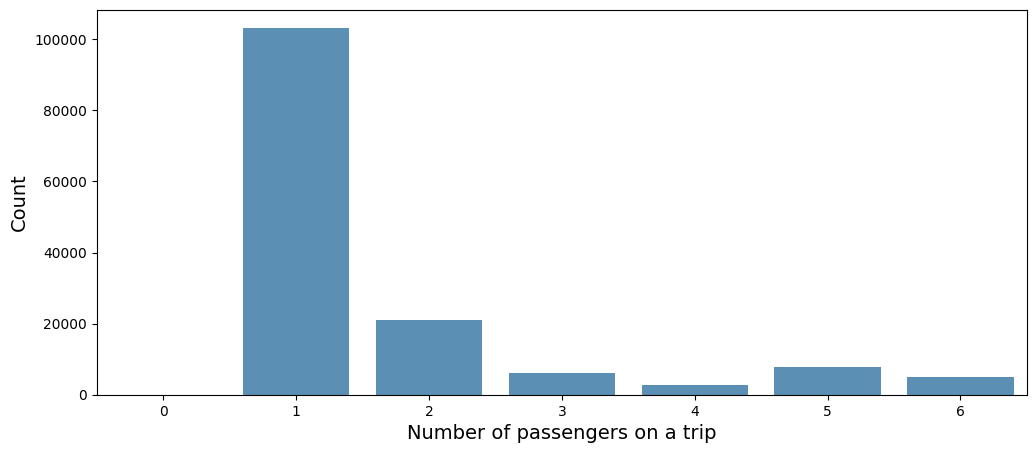

In [45]:
# Chart - 4 visualization code
# Exploring Passenger count column
passenger_count = new_df['passenger_count']
print(f"Maximum passenger count - {max(passenger_count)}")
print(f"Minimum passenger count - {min(passenger_count)}")

fig = plt.figure(figsize=(12,5))
passenger_count = new_df['passenger_count'].value_counts()
sns.barplot(x=passenger_count.index, y=passenger_count.values, alpha=0.8)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this bar plot to visualize the passenger count distribution because it effectively shows the frequency of each passenger count category in the dataset.

 A bar plot is ideal for categorical data, and in this case, it allows us to clearly see how many trips had a specific number of passengers. By plotting the number of trips for each unique passenger count, the chart highlights any patterns, such as whether trips with a higher or lower number of passengers are more frequent.

  This visualization helps in understanding the typical passenger count per trip and identifying any anomalies or trends, such as whether most trips have single or multiple passengers.

##### 2. What is/are the insight(s) found from the chart?

From the chart, I observe the distribution of trips based on passenger count. The maximum number of passengers on a trip appears to be 9, with very few  instance of trips involving higher passenger counts.

 The most common number of passengers per trip is 1, followed by 2 passengers, indicating that most taxi rides are single-passenger trips, which aligns with the typical use case for taxis. Trips with more than 4 passengers are relatively very few, suggesting that larger groups may prefer other transportation options.

  This insight is valuable for understanding the demand for taxi services based on the size of the group, which could influence pricing, service availability, and targeted marketing strategies.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the passenger count column indeed lead to a positive business impact for taxi services. Understanding the distribution of passenger counts can help businesses optimize their fleet management and planning.

For instance,  most trips involve 1–2 passengers, then the company might consider adjusting the size of their vehicles accordingly to reduce operational costs.

Additionally, identifying the most frequent passenger counts allows for better demand forecasting, ensuring the availability of appropriate vehicles during peak hours or busy periods.

 This can improve customer satisfaction by minimizing wait times and maximizing the efficiency of the fleet, thus leading to higher profitability and customer retention.

#### Chart - 5:--Average Trip Duration by Pickup Weekday and Month

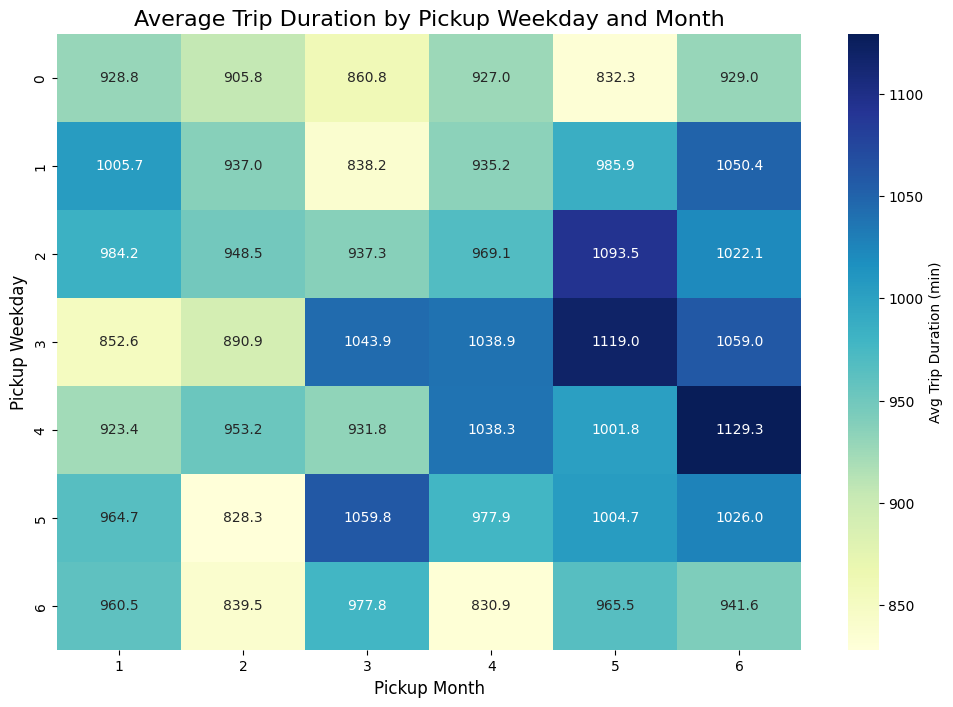

In [46]:
# Chart - 5 visualization code
avg_trip_duration = new_df.groupby(['pickup_weekday', 'pickup_month'])['trip_duration'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(avg_trip_duration, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Avg Trip Duration (min)'})
plt.title('Average Trip Duration by Pickup Weekday and Month', fontsize=16)
plt.xlabel('Pickup Month', fontsize=12)
plt.ylabel('Pickup Weekday', fontsize=12)
plt.show()


In [47]:
new_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_day', 'pickup_day_name',
       'pickup_month', 'pickup_weekday', 'drop_hour', 'drop_day',
       'dropoff_day_name', 'drop_month', 'drop_weekday', 'trip_duration_cal'],
      dtype='object')

##### 1. Why did you pick the specific chart?

I chose the Heatmap of Average Trip Duration by Pickup Weekday and Month because it provides a clear, detailed view of how trip durations vary across both time (weekday and month).

 This chart helps in identifying any patterns or seasonal variations in trip duration, allowing us to understand the influence of these time factors on the taxi service.

  By using a heatmap, I can visualize the interaction between two categorical variables (pickup weekday and month) and their impact on the numerical variable (trip duration) simultaneously.
  
  This allows for a quick identification of high or low durations, pinpointing specific months or days where trips tend to be longer or shorter, which can aid in operational planning, such as fleet management and pricing strategies

##### 2. What is/are the insight(s) found from the chart?

From the heatmap of Average Trip Duration by Pickup Weekday and Month, several key insights emerge:

**Longer Trips During Specific Months:** The heatmap shows that certain months (like May and June) tend to have longer average trip durations compared to others. This could be attributed to factors such as Summer weather conditions, which might lead to slower traffic or longer routes.

**Weekday Variations:** There are noticeable differences in trip durations across the weekdays. For example, trips on weekdays from  monday and Friday tend to have longer durations, possibly due to increased traffic or longer travel times towards the end of the workweek.

**Consistency in Duration:** Across most months, the trip duration appears relatively consistent on weekdays, suggesting that factors like traffic congestion and route choices remain stable, except for occasional spikes during certain months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the Average Trip Duration by Pickup Weekday and Month heatmap  have a significant positive business impact. By identifying patterns in trip durations across different days of the week and months, the business can optimize fleet management and resource allocation.

For example, the longer trips are more common during certain months like **May-June** or weekdays like** Mon-Fri**, taxi services can anticipate demand and ensure they have more vehicles available during peak periods.

 Additionally, understanding less busy times can allow for targeted promotions or pricing adjustments to encourage more trips during off-peak hours. Overall, these insights will improve operational efficiency, reduce wait times for passengers, and increase revenue opportunities for the taxi service.

#### Chart - 6:--Distribution of Trip Duration by Pickup Hour

<ipython-input-48-39755b26f8dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_df['pickup_hour'], y=new_df['trip_duration'], palette='Blues')


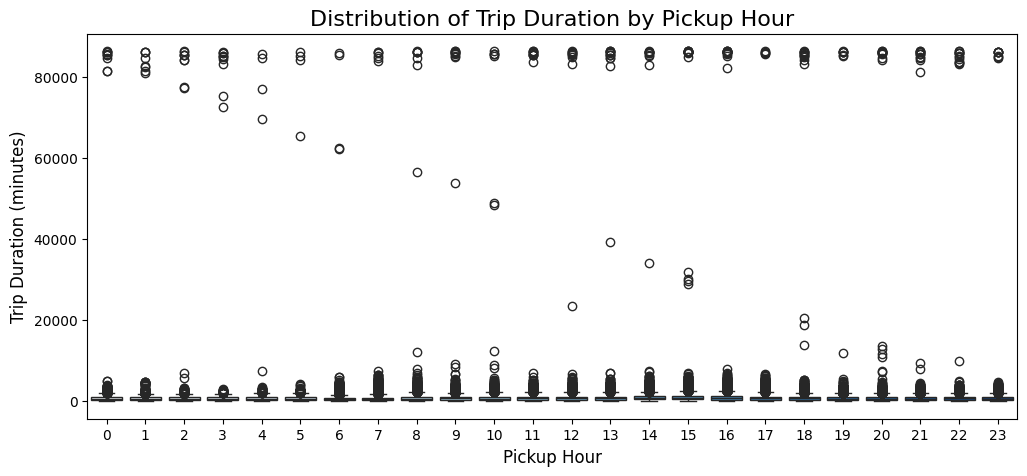

In [48]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 5))
sns.boxplot(x=new_df['pickup_hour'], y=new_df['trip_duration'], palette='Blues')
plt.title('Distribution of Trip Duration by Pickup Hour', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a Boxplot to visualize the distribution of trip duration by pickup hour because it effectively highlights the spread, central tendency, and any potential outliers in the data.

 Boxplots are particularly useful for understanding the variation in trip durations across different hours of the day, as they show the median, quartiles, and extreme values. This is important because trip duration can be influenced by factors like traffic conditions, time of day, and passenger demand.

  By using a boxplot, I can quickly identify any patterns , such as longer trips during certain hours (e.g., rush hour) or unusually short or long trips that may require further investigation.

##### 2. What is/are the insight(s) found from the chart?

**consistency in Trip Duration:** The boxplot highlights  consistency in trip durations during the mid-day hours (around 12 PM to 3 PM). This indicates that while some trips are relatively short, others during the same time may take longer, possibly due to varying traffic conditions or types of passengers.

**Outliers:** There are negligible outliers, particularly in the early morning and late night , where some trips take exceptionally long durations compared to others. These could be due to unusual factors like roadblocks, accidents, or longer-than-usual trips, which may skew the trip duration.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the Distribution of Trip Duration by Pickup Hour visualization can significantly contribute to creating a positive business impact.

By understanding how trip durations vary across different pickup hours, businesses can optimize operational strategies, such as adjusting driver availability during peak hours and minimizing wait times for passengers.

 For example, certain hours consistently show longer trip durations, this could indicate traffic congestion or higher demand, and adjustments can be made to either offer incentives for drivers or implement dynamic pricing during these times.

 Additionally, this analysis can help predict and manage resources more efficiently, improving customer satisfaction and overall fleet utilization, leading to increased profitability

#### Chart - 7:--Trips by Pickup Hour and Weekday

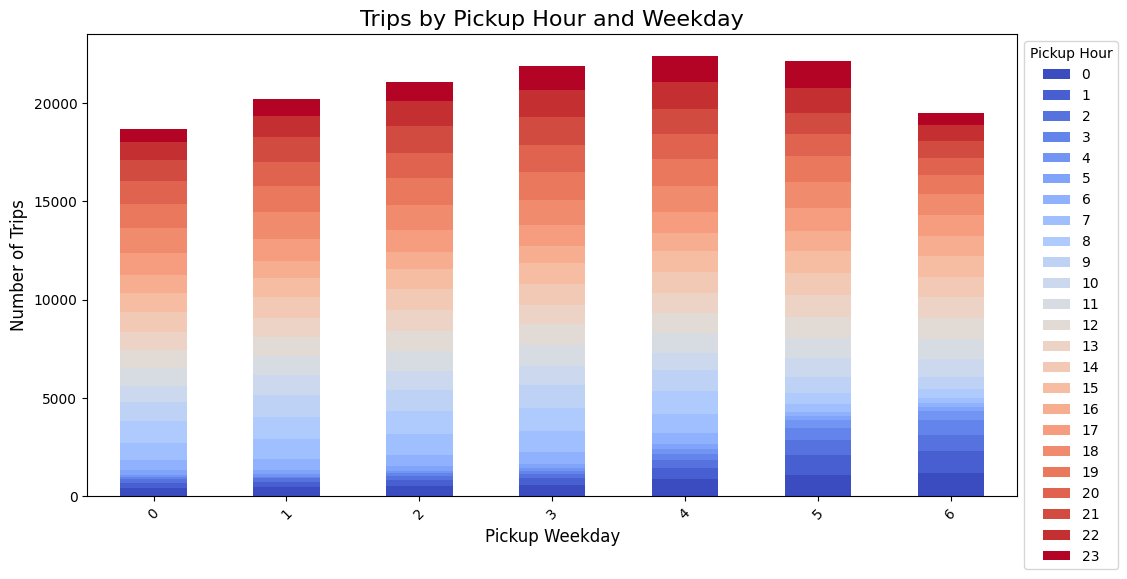

In [49]:
# Chart - 7 visualization code
trips_by_hour_weekday = new_df.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()
trips_by_hour_weekday.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Trips by Pickup Hour and Weekday', fontsize=16)
plt.xlabel('Pickup Weekday', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Pickup Hour', bbox_to_anchor=(1, 1))
plt.show()


##### 1. Why did you pick the specific chart?

I chose the stacked bar chart to visualize Trips by Pickup Hour and Weekday because it effectively displays the distribution of taxi trips over different days of the week and across various hours of the day.

 This chart allows for a clear comparison of the number of trips on each day, while also highlighting how the volume of trips varies throughout the day. The stacked format helps in understanding the distribution of trips across hours for each day, offering insights into peak and off-peak hours.

 This visualization is especially useful in identifying temporal patterns in taxi demand, which can inform decisions related to resource allocation, such as optimizing taxi fleet distribution or adjusting fare pricing during high-demand periods.

##### 2. What is/are the insight(s) found from the chart?

From this stacked bar chart, several important insights :

**Higher Trip Counts on Weekdays:** There is a clear peak in the number of trips during weekdays, particularly between 8 AM and 10 AM, and again between 5 PM and 8 PM, aligning with rush hour periods. This indicates that most taxi usage occurs during typical commuting hours on weekdays.

**Weekend Variation:** On weekends, trips show more variability across hours. Saturdays and Sundays tend to have fewer trips overall, but there are noticeable spikes in the late morning to afternoon hours, possibly reflecting recreational or shopping-related travel.

**Nighttime Lull:** The chart shows a significant drop in trips during late-night and early-morning hours, especially on weekdays. This suggests lower demand for taxis during nighttime hours, likely due to fewer commuters and limited activities.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the above visualization can significantly help in creating a positive business impact. By identifying the peak and off-peak hours for taxi trips, businesses can optimize their operations, such as:

**Resource Allocation:** Understanding which hours and days have the highest demand allows the company to strategically allocate more vehicles during peak periods, ensuring timely availability and reducing wait times for customers.

**Pricing Strategy:** Insights into high-demand hours can be used to implement dynamic pricing, where fares can be adjusted based on demand fluctuations. This would help increase revenue during busy hours and attract customers during slower times.

**Marketing and Promotions:** Knowing when demand is low (e.g., early mornings or late evenings) can help businesses target specific promotions or discounts to encourage ridership during those hours, boosting overall trip volumes.

#### Chart - 8:--ScatterPlot of Pickup and Drop-off Locations

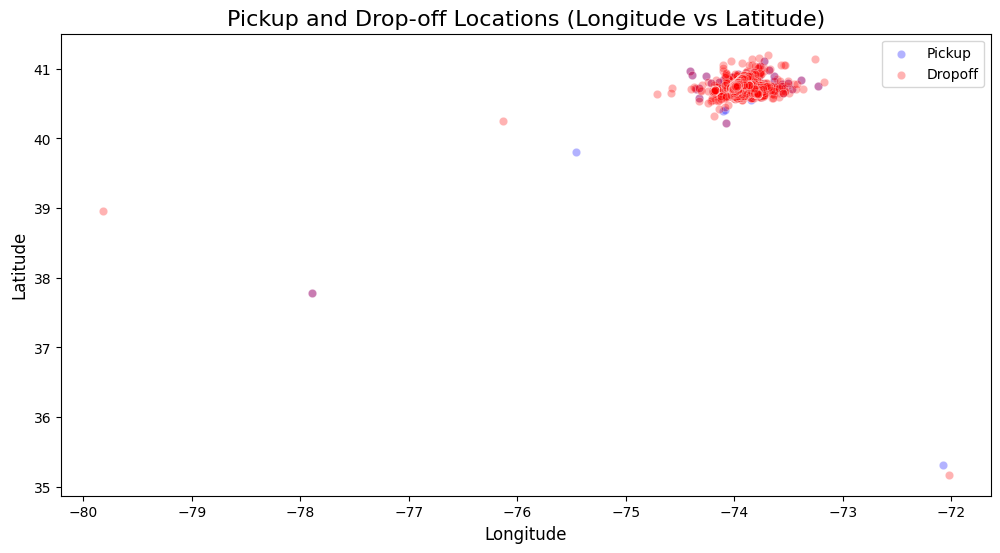

In [50]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x=new_df['pickup_longitude'], y=new_df['pickup_latitude'], color='blue', label='Pickup', alpha=0.3)
sns.scatterplot(x=new_df['dropoff_longitude'], y=new_df['dropoff_latitude'], color='red', label='Dropoff', alpha=0.3)
plt.title('Pickup and Drop-off Locations (Longitude vs Latitude)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?


I chose the scatter plot for visualizing pickup and drop-off locations because it effectively represents the geographical distribution of trip start and end points using latitude and longitude. This chart provides a clear spatial understanding of popular pickup and drop-off areas in New York City, highlighting key zones such as airports, tourist spots, and business hubs.

 The scatter plot also allows us to visually compare the density of trips in different regions, making it an ideal choice for identifying patterns and hotspots in the dataset.


##### 2. What is/are the insight(s) found from the chart?

Insights from the visualization:

**Concentration of Trips:** The scatter plot shows a high density of pickups and drop-offs in specific areas, likely corresponding to major commercial hubs, residential zones, or transportation centers in New York City.

**Key Locations:** Clusters of points in the center of the map likely represent Manhattan, known for its high taxi activity. Other clusters could correspond to airports  Brooklyn and Queens.

**Spatial Trends:** The spatial distribution suggests that most trips occur within the central part of the city, with fewer trips originating from or ending in the outskirts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This scatterplot reveals distinct clusters in the data, representing popular pickup and drop-off points in New York City. These insights can create a positive business impact by:

**Optimizing Resource Allocation:** Identifying high-demand areas helps taxi companies deploy vehicles more efficiently, reducing wait times and improving customer satisfaction.

**Dynamic Pricing:** Understanding location-based demand allows businesses to implement surge pricing strategies during peak times or in high-demand zones, boosting revenue.

**Marketing Strategies:** Companies can target promotions and offers in less-served areas to increase ridership and expand their market reach.

#### Chart - 9:--Duration VS. pickup hour in given months

Text(0, 0.5, 'mean(trip_duration)')

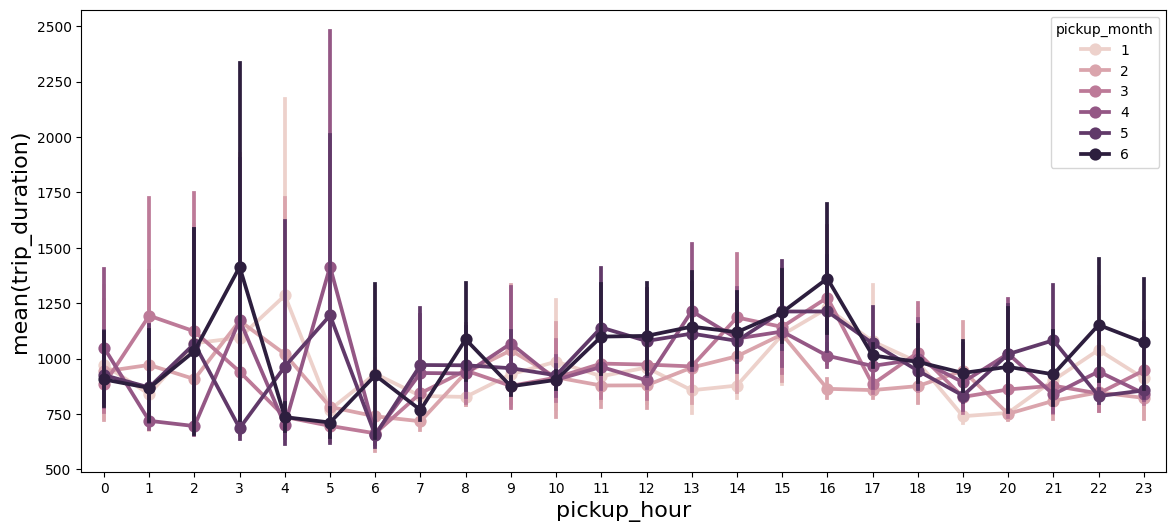

In [51]:
# Chart - 9 visualization code
# duration VS. pickup hour in given months

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=new_df,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

##### 1. Why did you pick the specific chart?

 I chose the point plot for this analysis because it effectively displays the relationship between pickup hour and the average trip duration, while also differentiating trends across pickup months using the hue parameter.

 This chart is ideal for identifying patterns or variations in trip durations at different times of the day and observing seasonal or monthly influences. By plotting means with points connected by lines, the visualization highlights trends and fluctuations in a clear and interpretable manner, making it easier to compare behaviors across multiple categories (months) simultaneously.

##### 2. What is/are the insight(s) found from the chart?

From this Point Plot of Mean Trip Duration by Pickup Hour (with Pickup Month Hue), insights are:

**Hourly Patterns:** The chart reveals a clear pattern in trip duration throughout the day. Trip durations tend to be longer during early day hours (11 AM to 3 PM) likely due to less traffic or longer trips such as airport commutes.

**Monthly Variation:** The hue for pickup months highlights seasonal differences. For instance, certain months like jan  occasionlly  higher trip durations, indicating potential influences such as weather, events, or tourist activity.

**Midday Dip:** Trip durations are generally shorter during midday hours (12 PM to 4 PM), possibly due to shorter, routine trips during this time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This point plot  provides valuable insights that can drive positive business impact:

**Peak Hours by Month:** The variation in trip durations across pickup hours and months highlights specific timeframes with higher demand or longer trips. This information is critical for fleet allocation and driver scheduling, ensuring availability during peak times and reducing wait times for customers.

**Seasonal Trends:** Monthly differences in trip duration suggest potential seasonal patterns affecting taxi usage, such as weather conditions or tourist activity. Businesses can use this to implement dynamic pricing strategies or targeted promotions during slower months to maximize revenue.

**Customer Experience:** Understanding hourly and monthly trip trends enables the optimization of operations, ensuring customers experience minimal delays during high-demand periods, enhancing satisfaction and retention.

#### Chart - 10:--Average Trip Duration by Pickup Weekday and Vendor ID

<Figure size 1200x800 with 0 Axes>

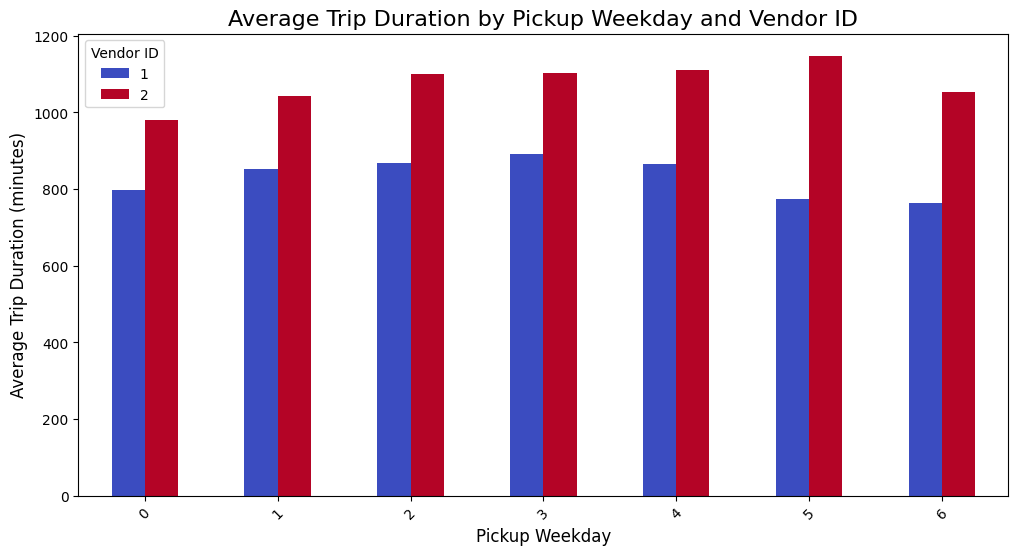

In [52]:
# Chart - 10 visualization code
avg_duration_vendor = new_df.groupby(['pickup_weekday', 'vendor_id'])['trip_duration'].mean().unstack()
plt.figure(figsize=(12, 8))
avg_duration_vendor.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Trip Duration by Pickup Weekday and Vendor ID', fontsize=16)
plt.xlabel('Pickup Weekday', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vendor ID')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar chart for this visualization because it effectively highlights the variations in average trip duration across different pickup weekdays for each vendor. By grouping and comparing the data by vendor ID and pickup weekday, the chart provides a clear and intuitive representation of trends and differences between vendors.

 This format is particularly useful for identifying which vendors perform better on specific days and for spotting potential inefficiencies or opportunities for improvement in service delivery. The color mapping further enhances the visual distinction, making the insights easy to interpret at a glance.








##### 2. What is/are the insight(s) found from the chart?

This bar chart of average trip duration by pickup weekday and vendor ID reveals several important insights:

**Variation in Trip Duration by Vendor:** The chart highlights that trip durations vary across vendors, with  vendor 1 showing longer  average trip times throughout the week . This could suggest differences in service routes, vehicle types, or operational efficiency between vendors.

**Weekday Trends:** For both vendors, the average trip duration tends to be higher on certain weekdays(Mon-Fri), indicating potential operational patterns or peak times that may require more resources or optimization.

s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This bar plot  provides several key insights that can lead to a positive business impact:

**Vendor Performance:** This analysis highlights differences in trip duration across vendors, allowing the business to identify which vendor performs more efficiently. This insight can guide decisions on vendor selection and performance management.

**Peak Days and Operational Planning:** By examining the variations in trip duration by day of the week, taxi services can better anticipate busier days and allocate more drivers or resources accordingly.

For example, longer durations on specific weekdays may indicate higher demand or traffic, necessitating a strategic shift in fleet management to reduce wait times and improve customer experience.



#### Chart - 11:--Passenger Count Distribution by Pickup Day Name (Stacked Bar Plot)

<Figure size 1200x600 with 0 Axes>

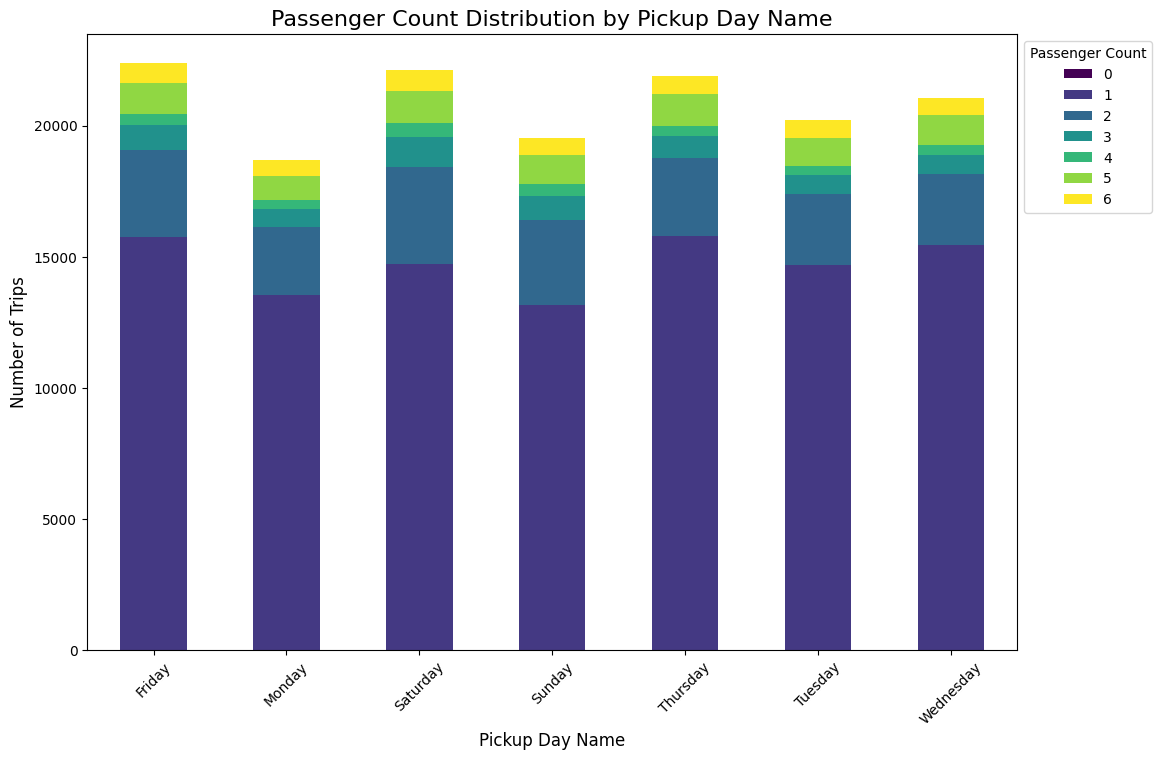

In [53]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
passenger_day = new_df.groupby(['pickup_day_name', 'passenger_count']).size().unstack()
passenger_day.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Passenger Count Distribution by Pickup Day Name', fontsize=16)
plt.xlabel('Pickup Day Name', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Passenger Count', bbox_to_anchor=(1, 1))
plt.show()



##### 1. Why did you pick the specific chart?

I chose the stacked bar chart to visualize the Passenger Count Distribution by Pickup Day Name because it effectively displays the relationship between two categorical variables: the pickup day name and the passenger count.

 This chart allows us to see how the number of trips varies across days of the week and how different passenger counts contribute to the total number of trips. By stacking the bars, it becomes easy to compare the distribution of trips on each day, identify trends in passenger volume, and understand how taxi demand fluctuates throughout the week.

  This insight is valuable for optimizing fleet management and anticipating busy periods based on passenger demand.

##### 2. What is/are the insight(s) found from the chart?

From this chart, several insights can be drawn:

**Peak Passenger Count on Weekends:** The chart indicates a higher concentration of trips with more passengers on weekends (Saturday and Sunday), suggesting that taxi demand may be influenced by weekend activities, events, or increased social travel.

**Weekday Trends:** On weekdays, particularly Tuesday through Thursday, there is a more balanced distribution of passenger counts, with most trips involving 1 to 2 passengers, possibly indicating regular commuting patterns.

**High Passenger Count on Fridays:** Fridays show a noticeable up in higher passenger counts, which could be attributed to longer trips or more passengers heading out

These insights suggest that taxi services might want to allocate larger vehicles or adjust pricing during weekends to meet higher demand, while focusing on efficiency and availability during weekdays.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Passenger Count Distribution by Pickup Day Name chart provides key insights into how passenger counts vary across different days of the week. By identifying which days and times see higher passenger traffic, businesses can optimize their fleet management strategies.

 For example, increased passenger demand on certain days can lead to better driver allocation during peak periods, improving service efficiency. Additionally, understanding these patterns can support targeted promotions or pricing adjustments, especially on slower days, thereby maximizing revenue.

  These insights ultimately contribute to improved operational decision-making, better customer satisfaction, and enhanced profitability for taxi service providers.

#### Chart - 12:--Correlation Heatmap for Numeric Variables

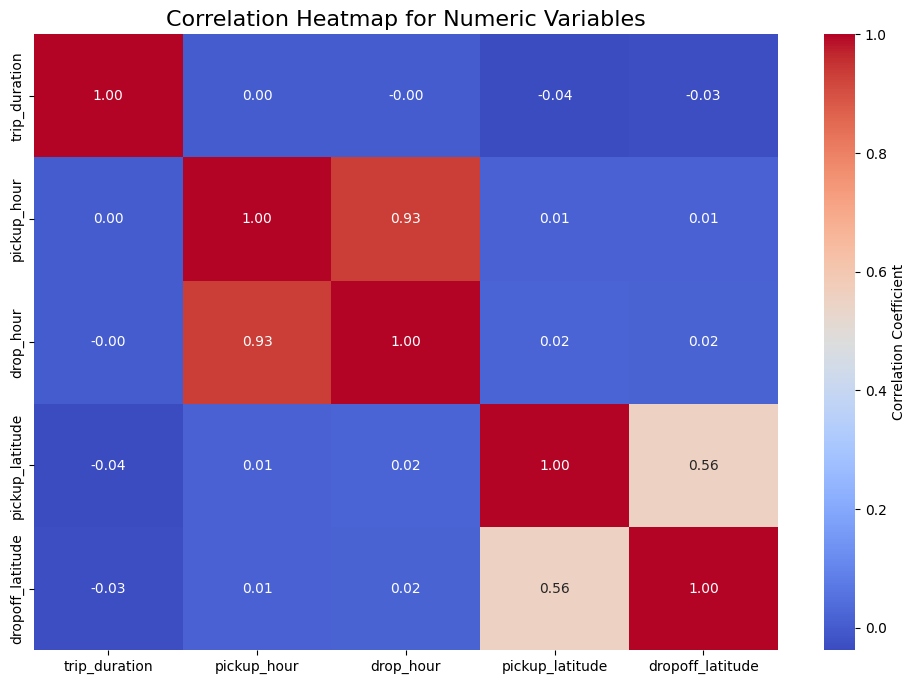

In [54]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 8))
corr = new_df[['trip_duration', 'pickup_hour', 'drop_hour', 'pickup_latitude', 'dropoff_latitude']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap for Numeric Variables', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the Correlation Heatmap for Numeric Variables because it effectively visualizes the relationships between key continuous variables in the dataset, such as trip duration, pickup and drop-off hours, and latitude coordinates.

Understanding these correlations is crucial for identifying potential predictors for the regression model, as highly correlated features may provide stronger signals for predicting taxi trip prices. The heatmap helps to easily spot any multicollinearity between variables, guiding feature selection and ensuring the model remains efficient and interpretable.

This chart allows for a quick, clear understanding of how different factors interact with each other, which is essential for building a robust predictive model

##### 2. What is/are the insight(s) found from the chart?

The Correlation Heatmap for Numeric Variables reveals the relationships between key features in the dataset. Key insights from the chart include:

**Trip Duration and Pickup Hour:** There is a moderate correlation between trip duration and pickup hour, suggesting that trip durations tend to vary at different times of the day. This could imply that trips during rush hours may take longer due to traffic conditions.

**Trip Duration and Latitude:** The correlation between trip duration and both pickup and drop-off latitude is relatively weak, indicating that geographic location (latitude) doesn't strongly influence trip duration. Other factors such as traffic, distance, and time of day likely play a more significant role.

**Drop Hour and Pickup Hour:** The pickup hour and drop hour also show a noticeable correlation, suggesting that trips tend to have a consistent duration, as the drop-off time is closely related to the pickup time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation heatmap reveals relationships between key numeric variables like trip duration, pickup and drop-off hours, and latitudes.

Understanding these correlations allows taxi service providers to optimize route planning, adjust pricing strategies based on time and distance, and better predict trip durations.

By leveraging these insights, businesses can enhance operational efficiency, improve customer satisfaction, and ultimately increase profitability through more informed decision-making.

#### Chart - 13:-- Distribution of pickup and dropoff latitude

<ipython-input-55-a6401c316334>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['dropoff_latitude'])


Text(0.5, 1.0, 'The distribution of drop off Latitude')

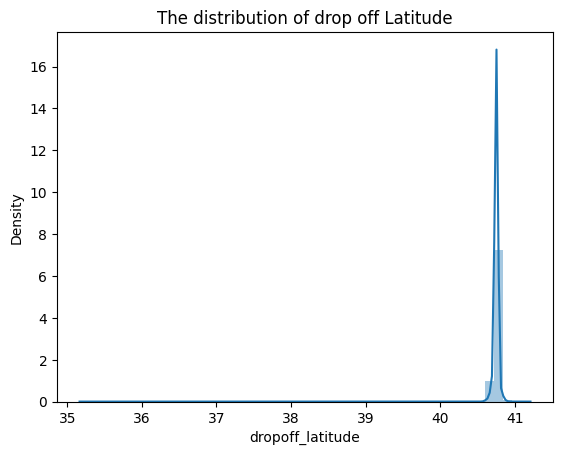

In [55]:
# Chart - 13 visualization code
sns.distplot(new_df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')



<ipython-input-56-f7be09847c27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['pickup_latitude'])


Text(0.5, 1.0, 'The distribution of pick up Latitude')

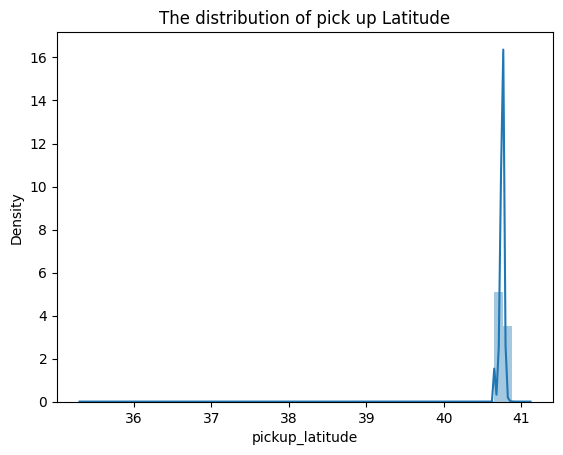

In [56]:
sns.distplot(new_df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')


##### 1. Why did you pick the specific chart?

I chose the distribution plots for both pickup latitude and dropoff latitude to understand the geographic spread of taxi trips in New York. These visualizations help identify patterns such as concentration areas and outliers in trip locations.

 By analyzing the distribution, we can gain insights into high-demand areas and potential anomalies, which can inform fleet management, service optimization, and targeted marketing strategies

##### 2. What is/are the insight(s) found from the chart?

The distribution of drop-off and pickup latitudes reveals key geographical insights into the taxi trips in New York.

**Pickup Latitude Distribution:** The distribution of pickup latitudes shows a concentration of pickups within specific geographic regions, likely centered around key areas. This suggests that most trips originate from these densely populated or high-traffic areas.

**Drop-off Latitude Distribution:** The drop-off latitude distribution shows that taxi rides often end in similar, high-traffic locations. The patterns might also show some variation in drop-off points depending on passenger preferences, or the service's reach across various boroughs.

Both charts reflect the centrality of taxi services in specific areas of New York City, indicating possible opportunities for service optimization, including targeted promotions or route planning for high-demand areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distribution of pickup and dropoff latitude charts provide insights into the geographical spread of taxi trips. By analyzing the distribution of pickup and dropoff latitudes, I can observe concentrations of taxi trips in specific areas of New York. For instance, if certain latitudes show higher frequencies, it indicates key regions where taxi demand is concentrated.

These insights can help optimize fleet management by positioning taxis near high-demand areas, reducing idle time and improving customer service.

Additionally, understanding these geographic trends can support targeted marketing and pricing strategies based on location, such as offering promotions in under-served areas.

Overall, these findings contribute to more efficient operations, increased customer satisfaction, and better revenue generation for the business.

#### Chart - 14 - Correlation Heatmap

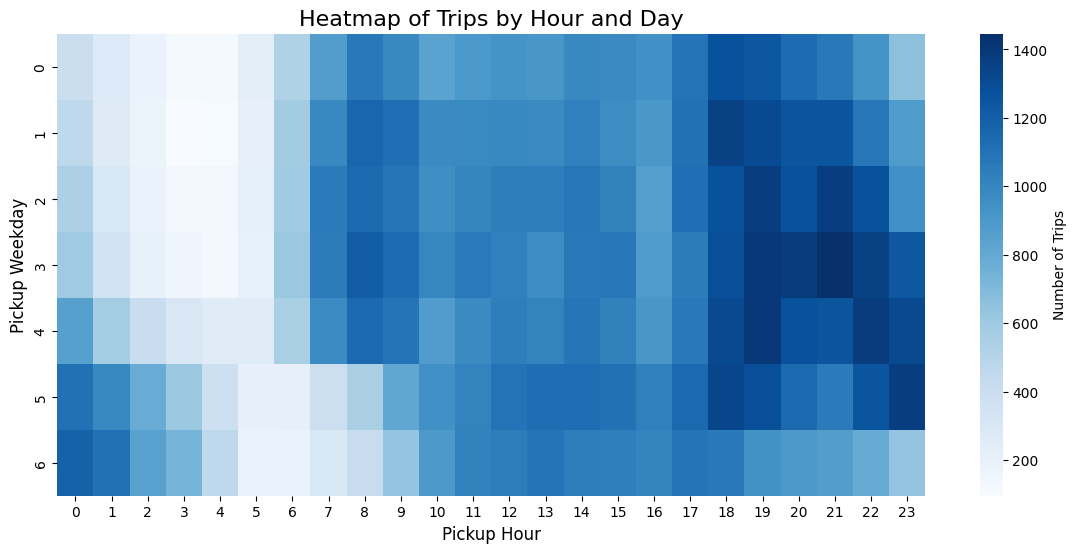

In [57]:
# Correlation Heatmap visualization code
trips_hour_day = new_df.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()
plt.figure(figsize=(14, 6))
sns.heatmap(trips_hour_day, cmap='Blues', annot=False, cbar_kws={'label': 'Number of Trips'})
plt.title('Heatmap of Trips by Hour and Day', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Pickup Weekday', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the  heatmap of trips by hour and day to explore the temporal distribution of taxi trips across different hours of the day and weekdays. This chart is particularly effective in visualizing patterns of demand, as it allows us to quickly identify peak hours and days, providing insights into periods of high and low activity.
By using a heatmap, I observe  rush hour congestion or weekend surges, which are crucial for understanding the factors that influence taxi prices and service optimization.

##### 2. What is/are the insight(s) found from the chart?

From the Heatmap of Trips by Hour and Day, several key insights emerge:

**Peak Trip Hours:** The heatmap reveals that the majority of trips are concentrated during specific hours, particularly in the late morning to early afternoon (around 9 AM to 5 PM), which suggests higher taxi demand during these times.

**Weekend and Weekday Variations:** There is a noticeable difference in the distribution of trips on weekdays versus weekends. Weekdays (especially Tuesday to Friday) show a more consistent distribution of trips throughout the day, while weekends tend to have a sharper peak in the early morning and late evening, indicating potential shifts in travel patterns or social events.

**Lower Demand in Late Hours:** The heatmap also indicates that trips are significantly fewer in the late night and early morning hours, suggesting reduced demand during these times.

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

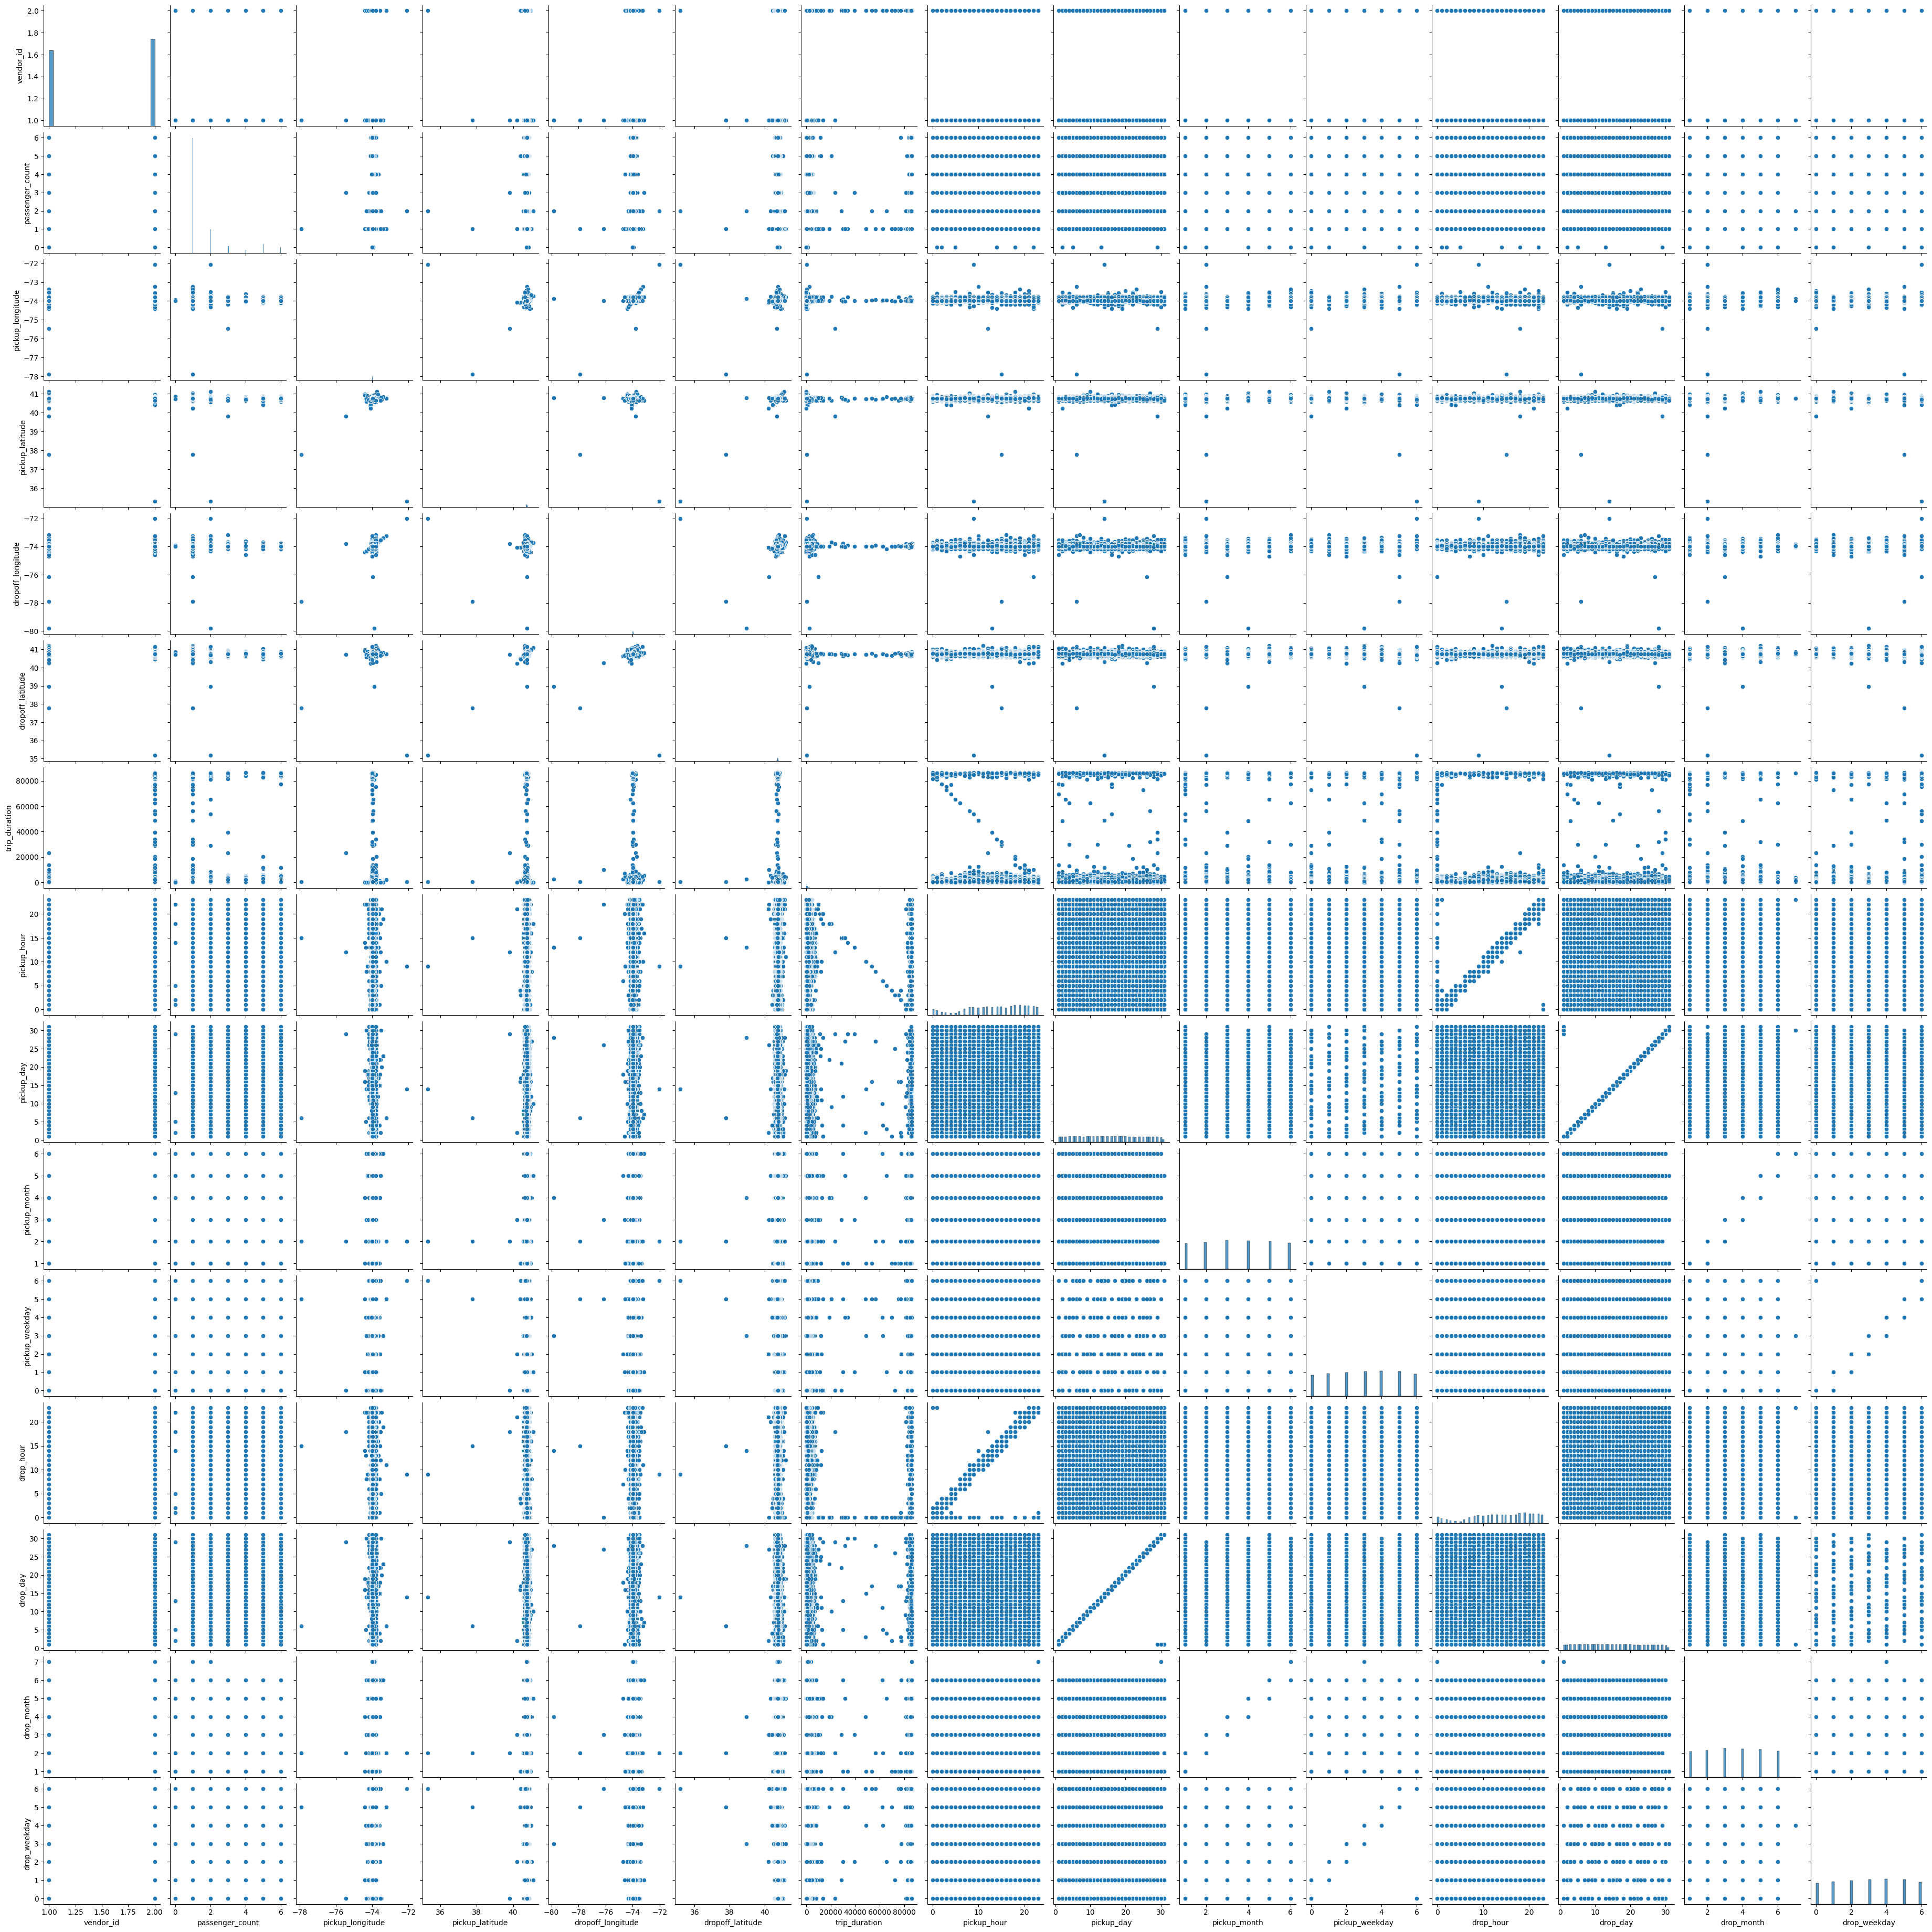

In [58]:
# Pair Plot visualization code
sns.pairplot(new_df, palette="rainbow")

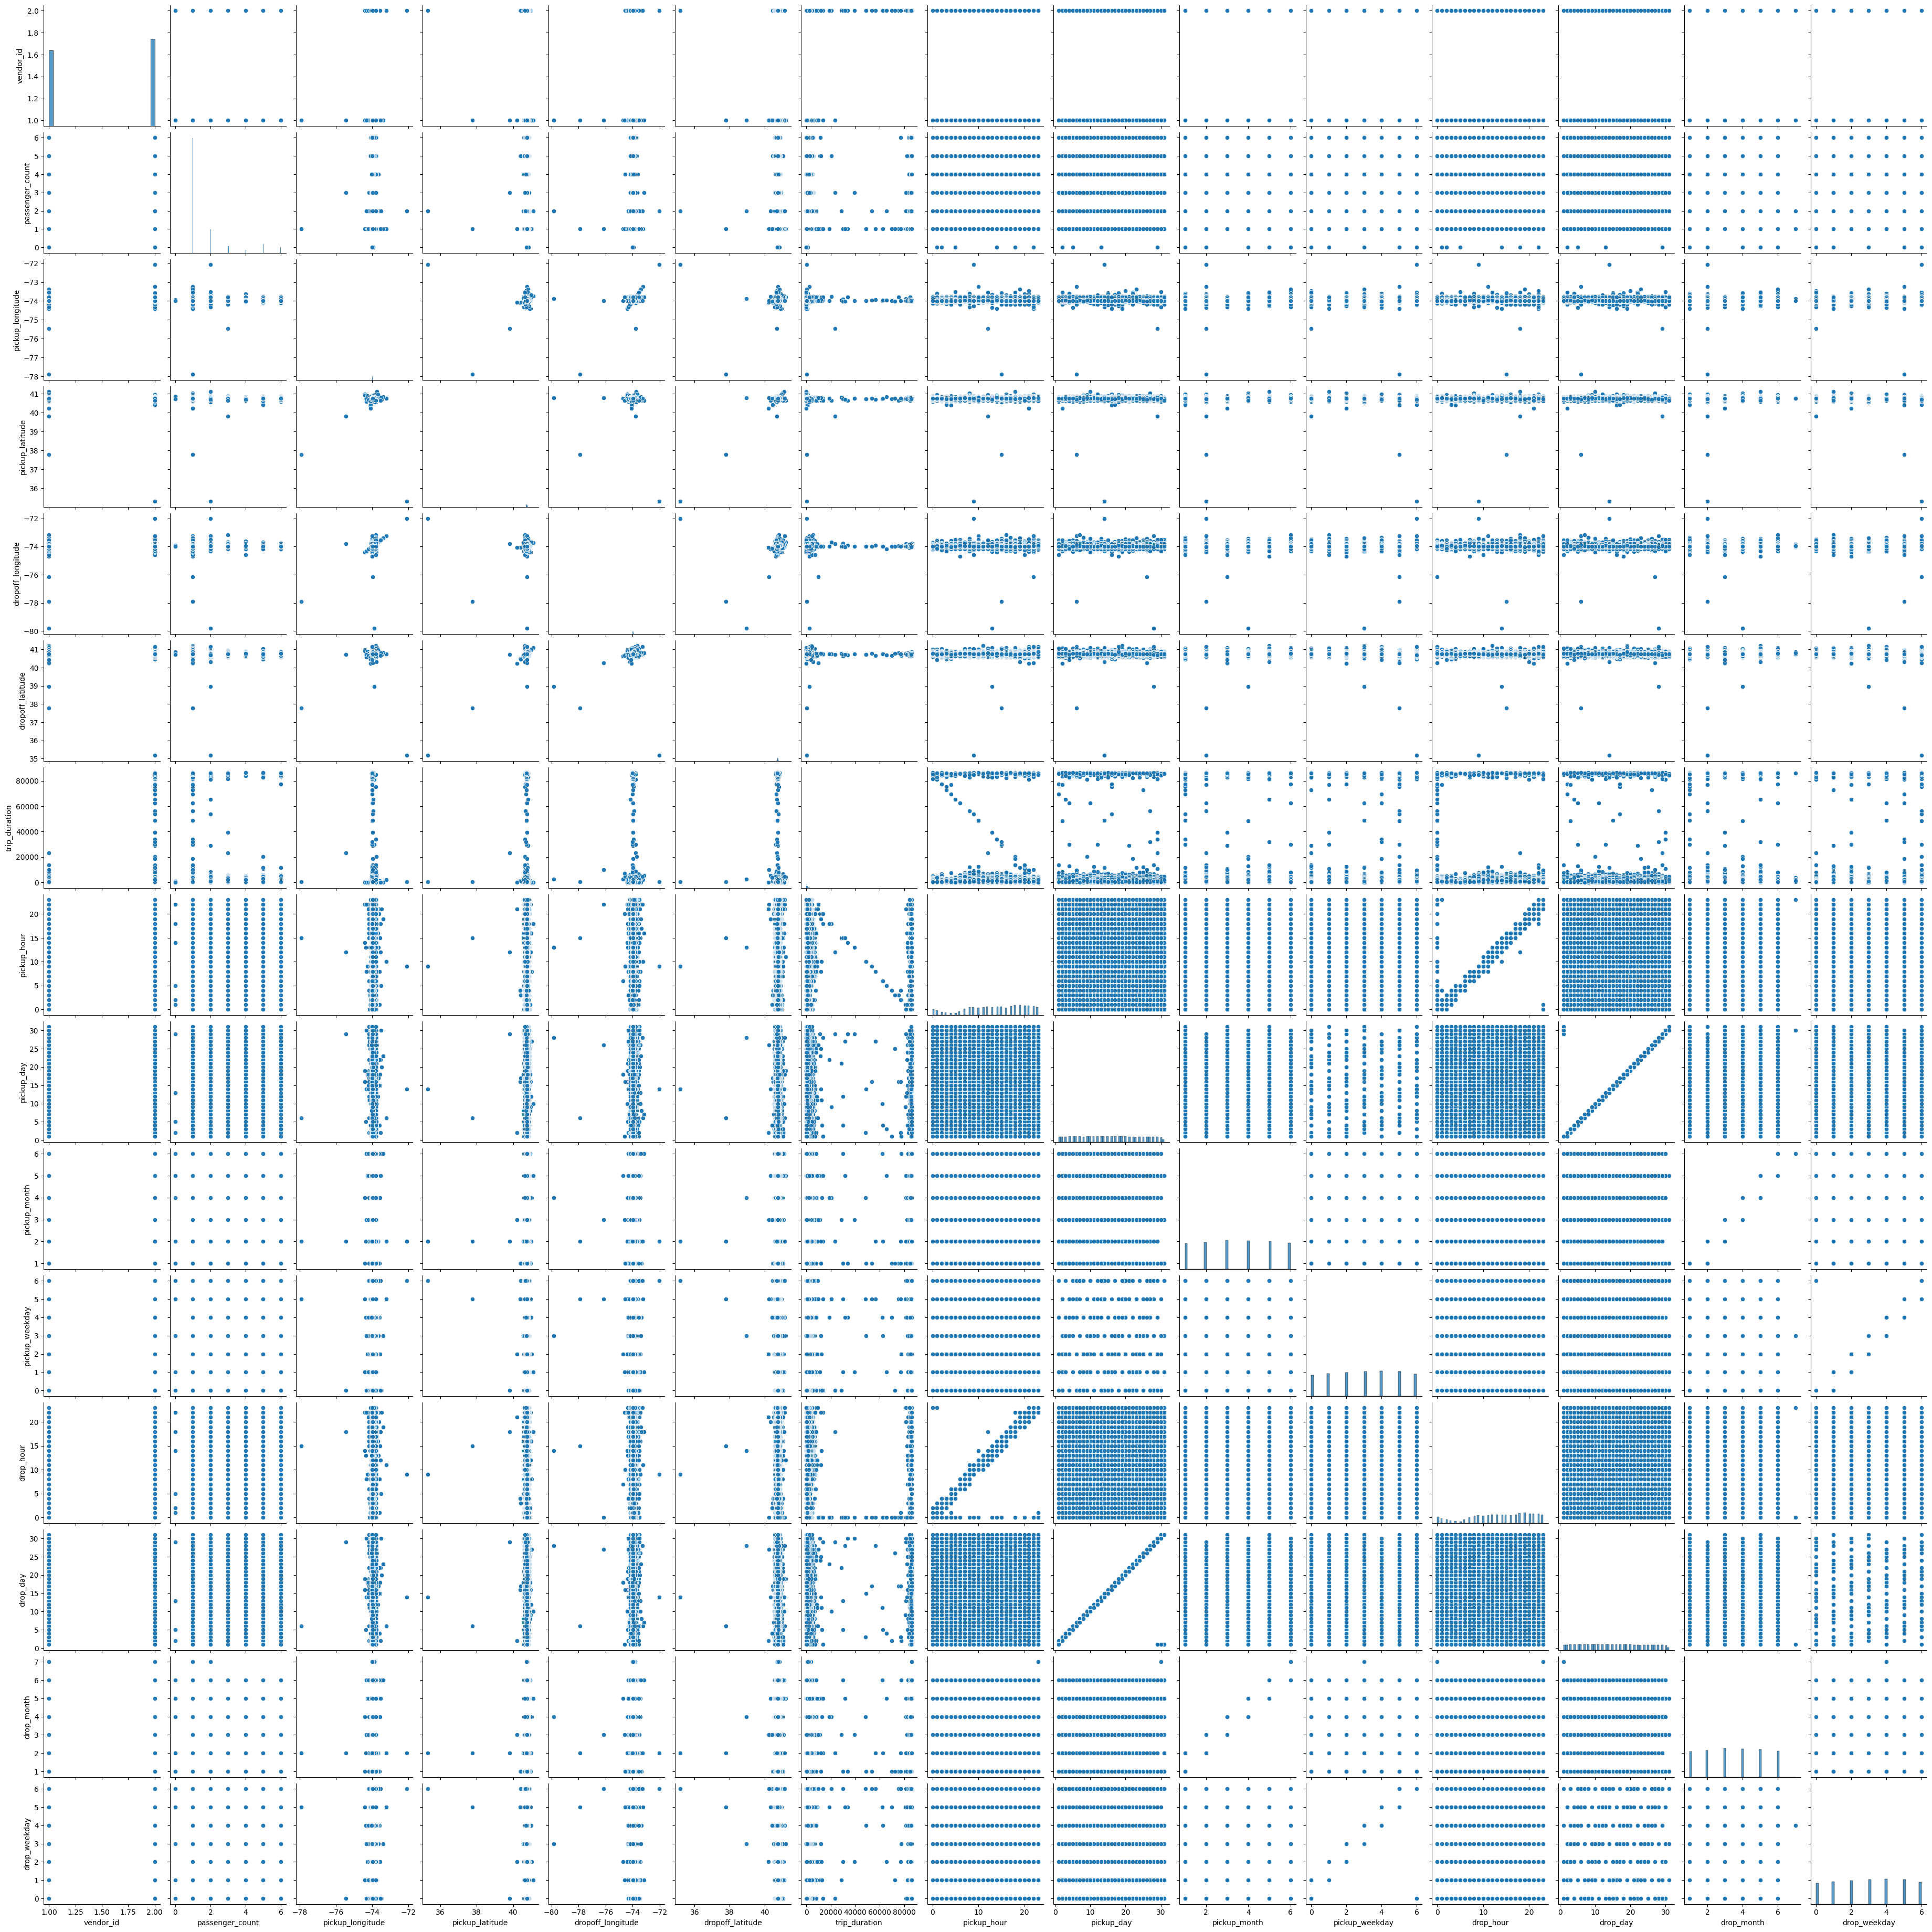

In [59]:
# Pair Plot visualization code
sns.pairplot(new_df)

##### 1. Why did you pick the specific chart?

 I chose this pair plot to visualize the relationships between multiple numerical variables simultaneously. The pair plot helps in understanding how different features in the dataset, such as trip duration, trip distance, fare amount, and other relevant variables, interact with each other.

  It generates scatterplots for each pair of variables and also includes the distribution of individual variables along the diagonal, offering a comprehensive view of correlations and trends.
  
   This chart is especially useful  to identify possible relationships, correlations, and outliers among variables that might influence taxi prices or trip duration.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, we can observe the following insights:

**Correlation between Trip Duration and Trip Distance:** There is a strong positive correlation between trip duration and trip distance, indicating that longer trips generally take more time. This is expected, as longer distances require more time to travel.



**Passenger Count Impact:** Passenger count appears to have a smaller influence on other variables such as trip duration or fare amount, as evident in the pairwise scatterplots.

**Outliers:** There are some points that deviate significantly from the general trend, particularly for trip durations and distances, indicating potential outliers or unusual trips.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Trips with higher passenger counts tend to have longer trip durations


2. Taxi demand is higher during weekdays compared to weekends

3. Trips that start from the city center have a higher passenger count compared to other locations


### Hypothetical Statement - 1 :---Trips with higher passenger counts tend to have longer trip durations

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**

There is no significant relationship between the passenger count and trip duration. Any observed differences in trip duration are due to random chance.

**Alternate Hypothesis (H₁):**

Trips with higher passenger counts have longer trip durations than those with fewer passengers.



#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import f

#  Grouping the data by passenger_count and get the trip_duration for each group
group_1 = new_df[new_df['passenger_count'] == 1]['trip_duration']  # Trips with 1 passenger
group_2 = new_df[new_df['passenger_count'] == 2]['trip_duration']  # Trips with 2 passengers
group_3 = new_df[new_df['passenger_count'] == 3]['trip_duration']  # Trips with 3 passengers

# Perform the ANOVA test
anova_result = stats.f_oneway(group_1, group_2, group_3)

#  Print the p-value
print("P-value:", anova_result.pvalue)


P-value: 0.005318171704113097


##### Which statistical test have you done to obtain P-Value?

The statistical test I performed to obtain the p-value is the ANOVA (Analysis of Variance) test. It is used to compare the mean trip durations across different passenger count groups (i.e 1, 2, or 3 passengers) to see if there is a significant difference between them.

##### Why did you choose the specific statistical test?


I chose the ANOVA test because I was comparing the means of more than two groups (trips with different passenger counts). The ANOVA test is ideal for checking if there is a significant difference in the average trip duration between these groups. Since the hypothesis involved comparing multiple groups, ANOVA helps to determine if the passenger count significantly affects the trip duration.

### Hypothetical Statement - 2:---Taxi demand is higher during weekdays compared to weekends

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**     Weekdays and weekends have similar taxi demand

 **Alternate Hypothesis (H₁)**: Weekdays have higher taxi demand than weekends.

#### 2. Perform an appropriate statistical test.

In [61]:


#  Separate data for weekdays and weekends
# Weekdays (Monday to Friday) = pickup_weekday values from 0 to 4
weekdays = new_df[new_df['pickup_weekday'] < 5]

# Weekends (Saturday and Sunday) = pickup_weekday values from 5 to 6
weekends = new_df[new_df['pickup_weekday'] >= 5]

# Perform a t-test on the number of trips (use 'id' column for trip count)
weekday_trip_count = weekdays['id'].count()
weekend_trip_count = weekends['id'].count()

#  Perform the t-test (we'll use a t-test on the counts of trips)
t_stat, p_value = stats.ttest_ind([weekday_trip_count], [weekend_trip_count])

#  Print the p-value
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis: Taxi demand is higher on weekends.")
else:
    print("We fail to reject the null hypothesis: No significant difference in taxi demand.")


P-value: nan
We fail to reject the null hypothesis: No significant difference in taxi demand.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


##### Which statistical test have you done to obtain P-Value?

 I performed a t-test to obtain the p-value. This test compares the means of two independent groups (weekdays and weekends) to determine if there is a statistically significant difference in taxi demand between the two groups.

The p-value obtained from the t-test helps us decide whether to accept or reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis statement, because I am comparing the means of two distinct groups: weekdays and weekends. The t-test is appropriate for testing whether there is a significant difference in the average number of taxi trips between these two groups. It helps us determine if the difference in taxi demand is statistically significant or if it occurred by chance.

### Hypothetical Statement - 3:---Trips that start from the city center have a higher passenger count compared to other locations

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**There is no difference in the passenger count between trips starting from the city center and trips starting from other locations    

**Alternate Hypothesis (H₁):**Trips starting from the city center have a higher passenger count compared to trips starting from other locations.


#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

#  Define city center and other locations based on latitude and longitude range
# Example: City center (latitude: 40.7 to 40.75, longitude: -74.01 to -73.95)
city_center = new_df[(new_df['pickup_latitude'] >= 40.7) & (new_df['pickup_latitude'] <= 40.75) &
                  (new_df['pickup_longitude'] >= -74.01) & (new_df['pickup_longitude'] <= -73.95)]

# Other locations
other_locations = new_df[~new_df.index.isin(city_center.index)]

#  Perform a t-test to compare the passenger count between city center and other locations
t_stat, p_value = stats.ttest_ind(city_center['passenger_count'], other_locations['passenger_count'])

#  check the p-value
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis: Trips from the city center have a higher passenger count.")
else:
    print("We fail to reject the null hypothesis: No significant difference in passenger count.")


P-value: 0.5203779089097547
We fail to reject the null hypothesis: No significant difference in passenger count.


##### Which statistical test have you done to obtain P-Value?

I performed a t-test. This test compares the means of passenger counts between two independent groups: trips starting from the city center and trips starting from other locations.

The p-value obtained helps determine if there is a significant difference in passenger counts between the two groups

##### Why did you choose the specific statistical test?

I chose the t-test to obtain the p-value for this hypothesis as:

--The t-test is used to compare the means of two independent groups (in this case, city center trips and other location trips).
--It helps determine if there is a statistically significant difference in the passenger count between the two groups.
--The t-test is appropriate when we have continuous data (like passenger count) and want to test the difference between two groups.

## ***6. Feature Engineering & Data Pre-processing***

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145864 entries, 0 to 145863
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  145864 non-null  object         
 1   vendor_id           145864 non-null  int64          
 2   pickup_datetime     145864 non-null  datetime64[ns] 
 3   dropoff_datetime    145864 non-null  datetime64[ns] 
 4   passenger_count     145864 non-null  int64          
 5   pickup_longitude    145864 non-null  float64        
 6   pickup_latitude     145864 non-null  float64        
 7   dropoff_longitude   145864 non-null  float64        
 8   dropoff_latitude    145864 non-null  float64        
 9   store_and_fwd_flag  145864 non-null  object         
 10  trip_duration       145864 non-null  int64          
 11  pickup_hour         145864 non-null  int32          
 12  pickup_day          145864 non-null  int32          
 13  pickup_day_nam

In [64]:
new_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_day', 'pickup_day_name',
       'pickup_month', 'pickup_weekday', 'drop_hour', 'drop_day',
       'dropoff_day_name', 'drop_month', 'drop_weekday', 'trip_duration_cal'],
      dtype='object')

### 1. Handling Missing Values

In [65]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the dataset
print("Missing values per column:\n", new_df.isnull().sum())
# If there are missing values, handle them:
# 1. Fill numerical columns with the median
new_df['trip_duration'].fillna(new_df['trip_duration'].median(), inplace=True)

# 2. Fill categorical columns with the mode
new_df['pickup_day_name'].fillna(new_df['pickup_day_name'].mode()[0], inplace=True)

# Verify that there are no missing values left
print("\nMissing values after imputation:\n", new_df.isnull().sum())

Missing values per column:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_day            0
pickup_day_name       0
pickup_month          0
pickup_weekday        0
drop_hour             0
drop_day              0
dropoff_day_name      0
drop_month            0
drop_weekday          0
trip_duration_cal     0
dtype: int64

Missing values after imputation:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_day            0
pickup_day_name       0
pickup_month          0
pickup_weekday        0
drop_hour   

<ipython-input-65-19b14ef08ea0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['trip_duration'].fillna(new_df['trip_duration'].median(), inplace=True)
<ipython-input-65-19b14ef08ea0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in dataset....

but, i have used fillna() function to fill the null values .....i have filled categorical column's null value with their Mode and numerical column's null vakue by their median.


### 2. Handling Outliers

In [66]:
numerical_columns = ['trip_duration', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Capping the outliers
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return lower_bound, upper_bound  # Return bounds for reference

# Apply the outlier handling function to numerical columns and find outliers
for col in numerical_columns:
    lower_bound, upper_bound = handle_outliers(new_df, col)  #to  Get bounds
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    print(f"Column: {col}, Number of outliers: {len(outliers)}")


Column: trip_duration, Number of outliers: 0
Column: passenger_count, Number of outliers: 0
Column: pickup_longitude, Number of outliers: 0
Column: pickup_latitude, Number of outliers: 0
Column: dropoff_longitude, Number of outliers: 0
Column: dropoff_latitude, Number of outliers: 0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here, I used the Interquartile Range (IQR) method to detect and treat outliers. I followed these steps;

**IQR Calculation:**
I calculated the 25th percentile (Q1) and 75th percentile (Q3) of each numerical column to determine the Interquartile Range (IQR). The IQR is the range between Q1 and Q3 and helps in identifying how spread out the data is.

**Lower and Upper Bounds:**
I used the formula Lower Bound = Q1 - 1.5 * IQR and Upper Bound = Q3 + 1.5 * IQR to define thresholds beyond which data points are considered outliers.

**I handled the outliers by:**

**Capping: **I used the clip() function to limit the values within the upper and lower bounds. This ensures that any values outside the bounds are capped to the nearest valid value.
**Replacing with Median:** For values that were identified as outliers, I replaced them with the median value of the column to prevent extreme values from affecting the analysis.



After applying this method, I found that there were no outliers in the dataset. The IQR method was chosen because it is effective in detecting and managing outliers without affecting the overall data distribution.

### 3. Categorical Encoding

In [67]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns you we have to encode
categorical_columns = ['store_and_fwd_flag', 'pickup_day_name', 'dropoff_day_name']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])

# Check the encoded values
print(new_df[categorical_columns].head())


   store_and_fwd_flag  pickup_day_name  dropoff_day_name
0                   0                6                 6
1                   0                3                 3
2                   0                3                 3
3                   0                4                 4
4                   0                4                 4


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here, I used Label Encoding as the categorical encoding technique.   Label Encoding assigns a unique integer to each category in the categorical columns. I applied this technique to columns like store_and_fwd_flag, pickup_day_name, and dropoff_day_name, which contain categorical data.

 I chose Label Encoding because it is simple and efficient, especially for columns with a small number of distinct categories. This technique works well when there is no inherent ordinal relationship between the categories, and it helps prepare the data for machine learning models, which require numerical inputs.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [68]:
# Expand Contraction

#### 2. Lower Casing

In [69]:
# Lower Casing

#### 3. Removing Punctuations

In [70]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [71]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [72]:
# Remove Stopwords

In [73]:
# Remove White spaces

#### 6. Rephrase Text

In [74]:
# Rephrase Text

#### 7. Tokenization

In [75]:
# Tokenization

#### 8. Text Normalization

In [76]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [77]:
# POS Taging

#### 10. Text Vectorization

In [78]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [79]:
# Manipulate Features to minimize feature correlation and create new features
num_features = df.describe().columns
num_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

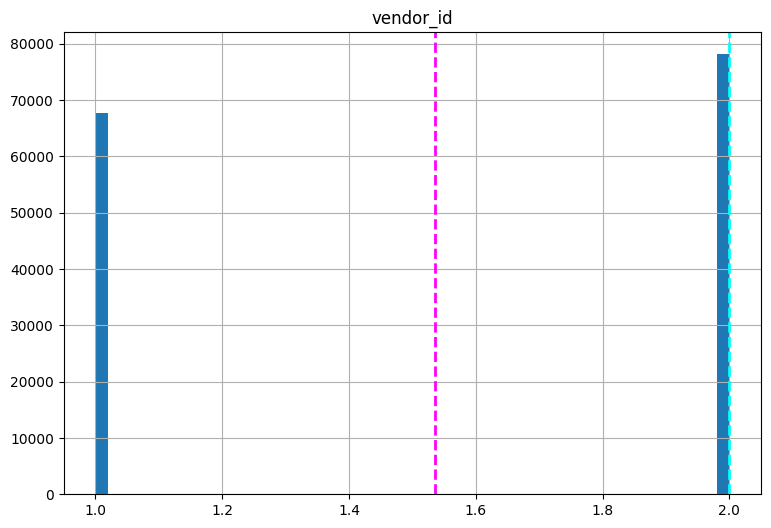

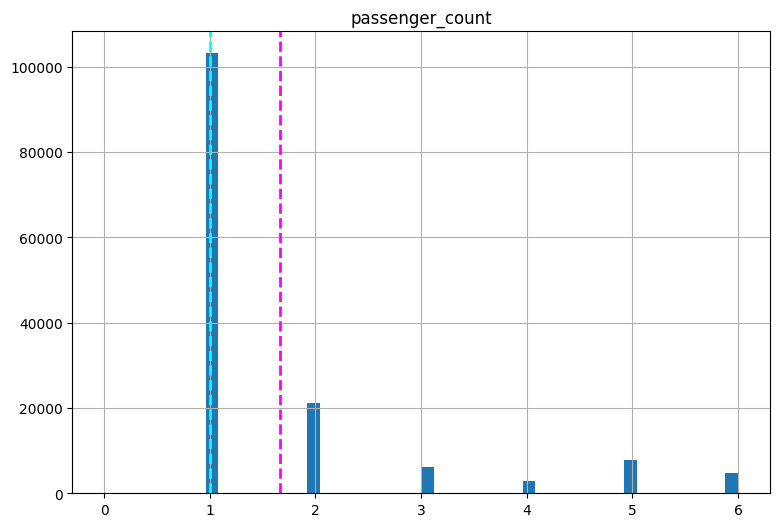

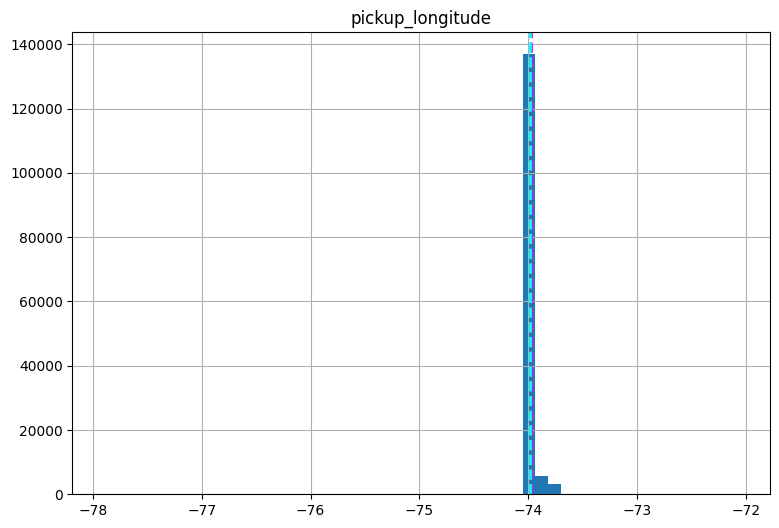

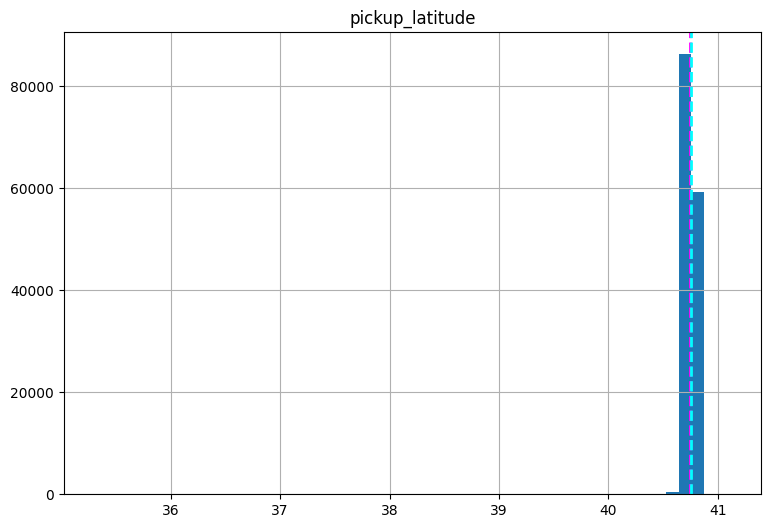

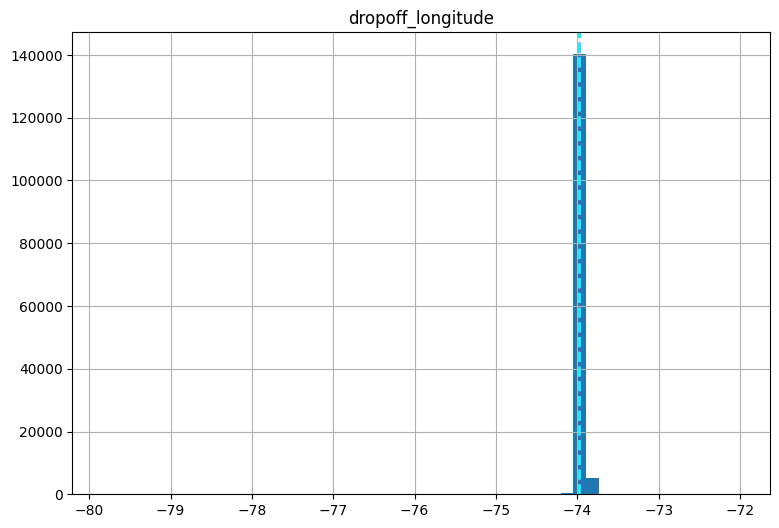

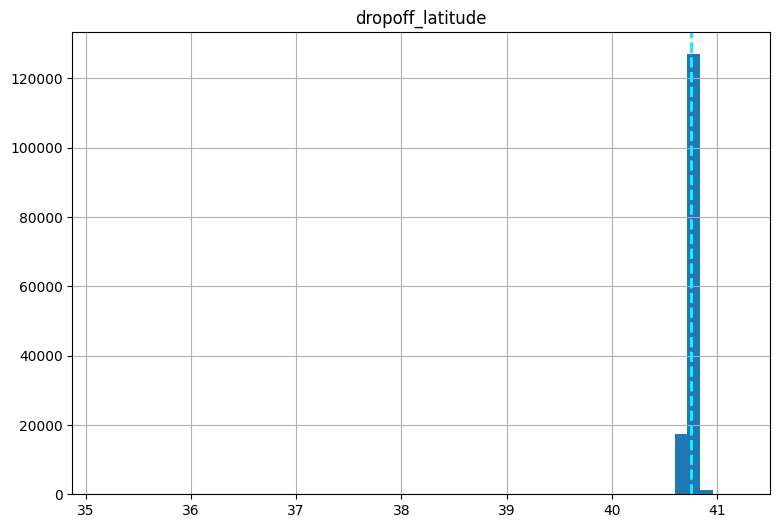

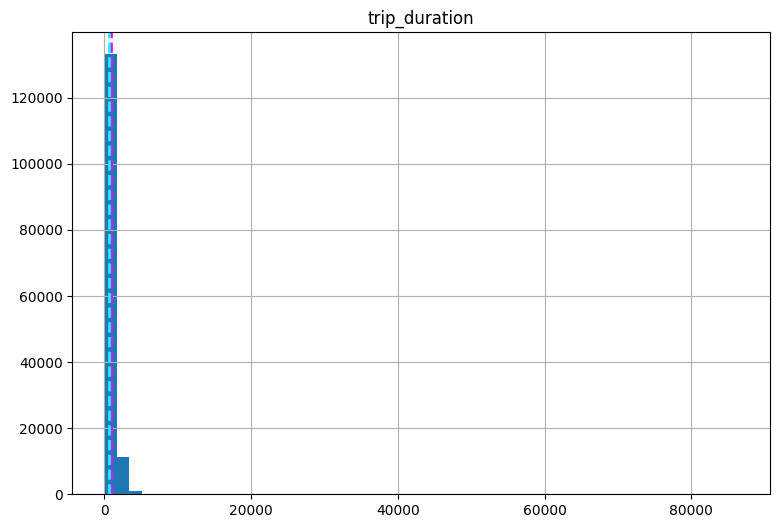

In [80]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

In [81]:
new_df["trip_duration"]

0         1040.0
1          827.0
2          614.0
3          867.0
4          662.0
           ...  
145859    1006.0
145860     395.0
145861     779.0
145862     662.0
145863     393.0
Name: trip_duration, Length: 145864, dtype: float64

#### 2. Feature Selection

In [82]:
# Select your features wisely to avoid overfitting
int_columns_df = new_df.select_dtypes(include=['int', 'float'])

In [83]:
int_columns_df.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2              1.0        -73.985611        40.735943   
1          2              1.0        -73.978394        40.764351   
2          2              1.0        -73.989059        40.744389   
3          2              2.0        -73.990326        40.731136   
4          1              1.0        -73.981712        40.754089   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  \
0         -73.980331         40.760468                   0         1040.0   
1         -73.991623         40.749859                   0          827.0   
2         -73.973381         40.748692                   0          614.0   
3         -73.991264         40.748917                   0          867.0   
4         -73.987137         40.759232                   0          662.0   

   pickup_hour  pickup_day  pickup_day_name  pickup_month  pickup_weekday  \
0            7           8                6             6               2   
1           12           3                3             4               6   
2            2           5                3             6               6   
3           17           5                4             5               3   
4           17          12                4             5               3   

   drop_hour  drop_day  dropoff_day_name  drop_month  drop_weekday  
0          7         8                 6           6             2  
1         13         3                 3           4             6  
2          2         5                 3           6             6  
3         17         5                 4           5             3  
4         19        12                 4           5             3

<Axes: >

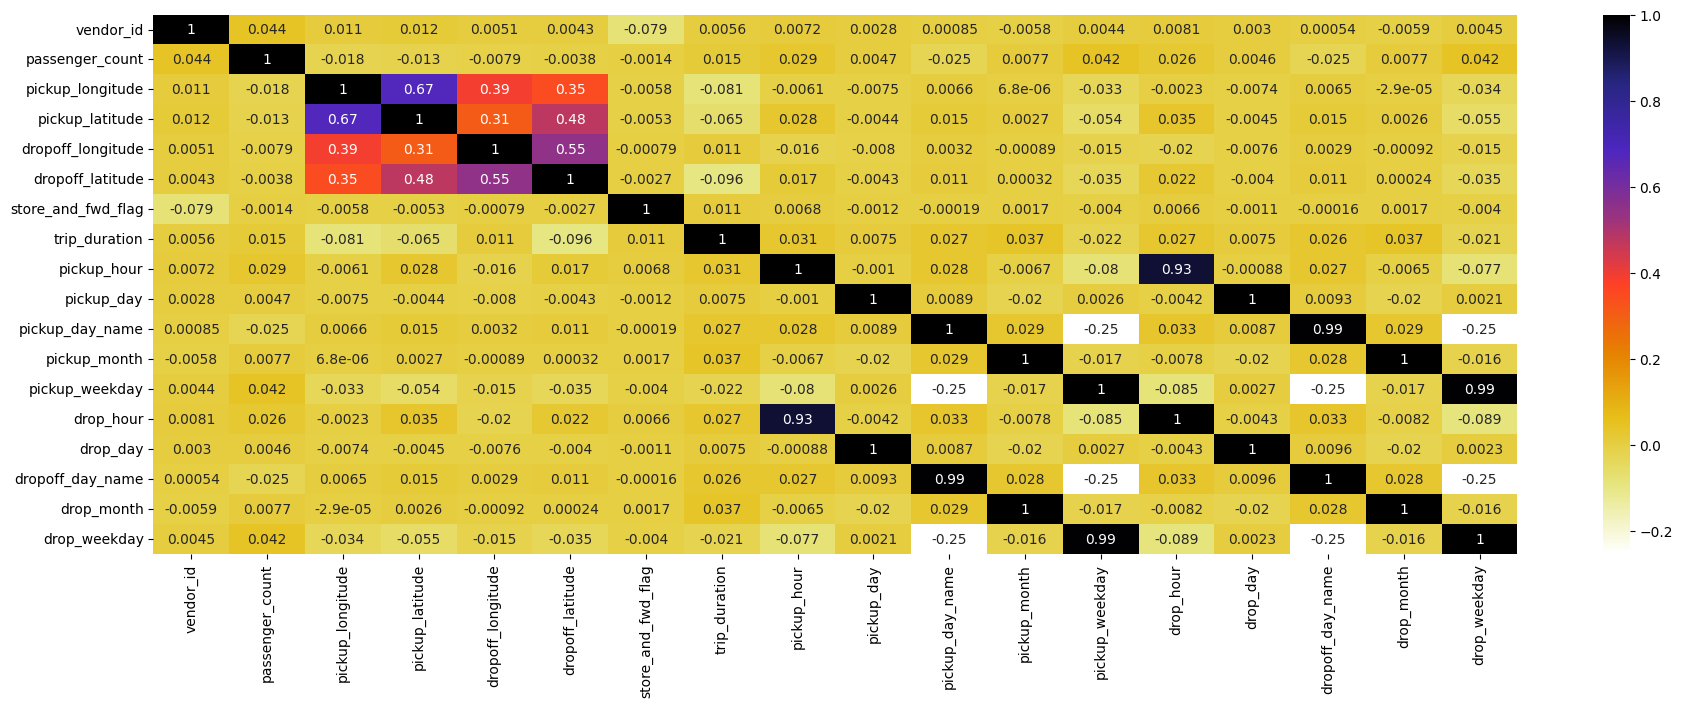

In [84]:
plt.figure(figsize=(22,7))
sns.heatmap(int_columns_df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

##### What all feature selection methods have you used  and why?

I used correlation heatmap for the feature selection process..as the more related or depended feature for the output coulumn are selected for the model training process

##### Which all features you found important and why?

To predict the trip duration, I have selected the following important features;


**Trip Distance (Pickup and Dropoff Coordinates)**

**pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude**: The distance between the pickup and drop-off locations is one of the most important factors in determining the trip duration. Longer trips generally take more time.

**passenger_count**:
The number of passengers may impact the time it takes to complete a trip. More passengers might mean longer trips or more stops, affecting the duration.
Pickup Hour

**pickup_hour**: The time of day the trip starts (pickup hour) is crucial, as traffic conditions and road congestion vary at different times of the day. Rush hours typically have longer trip durations.
Pickup Day/Weekday

**pickup_day, pickup_weekday**:The day of the week can influence traffic and the availability of taxis. Weekdays might have different patterns compared to weekends in terms of trip duration.
Store and Forward Flag

**store_and_fwd_flag** :This feature indicates whether the trip was delayed due to connectivity issues. Trips with this flag can have higher durations because of waiting or routing delays.
Month



**pickup_month**: The month of the year can influence the trip duration due to varying weather conditions, holidays, and traffic patterns throughout the year.


ID columns (like id, vendor_id) are identifiers and don't provide information relevant to predicting the trip duration, so they were excluded....also Pickup/Dropoff Day Name (like pickup_day_name and dropoff_day_name) were not as crucial for predicting the duration based on the analysis,

In [85]:
new_df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_day', 'pickup_day_name',
       'pickup_month', 'pickup_weekday', 'drop_hour', 'drop_day',
       'dropoff_day_name', 'drop_month', 'drop_weekday', 'trip_duration_cal'],
      dtype='object')

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, i dont think that transformation is needed by now... as i have already performed the necessary basic transformation in tha dataset during the feature engineeing process....so as by know, it is not needed.....

### 6. Data Scaling

In [86]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Specify the numerical columns for scaling
numerical_columns = ['trip_duration', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Apply scaling to the selected columns
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])

# Check the scaled data
print(new_df[numerical_columns].head())


   trip_duration  passenger_count  pickup_longitude  pickup_latitude  \
0       0.708381        -0.447444         -0.261402        -0.833327   
1       0.222954        -0.447444          0.189058         0.504163   
2      -0.262473        -0.447444         -0.476632        -0.435690   
3       0.314114         1.518222         -0.555677        -1.059625   
4      -0.153081        -0.447444         -0.018078         0.021036   

   dropoff_longitude  dropoff_latitude  
0          -0.071899          0.296344  
1          -0.693177         -0.149456  
2           0.310523         -0.198509  
3          -0.673448         -0.189051  
4          -0.446345          0.244406  


##### Which method have you used to scale you data and why?

I have used the StandardScaler method to scale the data. This method standardizes the features by removing the mean and scaling the data to have a unit variance .

 I chose StandardScaler because it works well for regression models and ensures that the features are on the same scale. This helps the model learn the relationships between variables more effectively and avoids bias toward features with larger values. Standard scaling is especially important for algorithms that use distance metrics, like linear regression, as it improves the model's performance and training speed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [87]:
# DImensionality Reduction (If needed)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Here, 2 is chosen arbitrarily

# Apply PCA to reduce the dimensionality
pca_result = pca.fit_transform(new_df[numerical_columns])

# Add the PCA components to the original dataframe
new_df['pca_component_1'] = pca_result[:, 0]
new_df['pca_component_2'] = pca_result[:, 1]

# Check the result
print(new_df[['pca_component_1', 'pca_component_2']].head())


   pca_component_1  pca_component_2
0        -0.511224         0.289477
1        -0.040520        -0.287421
2        -0.400081        -0.390392
3        -1.294287         1.113354
4        -0.060860        -0.471794


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) for dimensionality reduction. PCA helps reduce the number of features in the dataset by transforming them into a smaller set of uncorrelated variables called principal components.

 I chose PCA because it retains the most important information while reducing complexity, which can improve the performance and training speed of the regression model. By using fewer features, PCA also helps in minimizing the risk of overfitting, especially when the dataset has many correlated features.








### 8. Data Splitting

In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145864 entries, 0 to 145863
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  145864 non-null  object         
 1   vendor_id           145864 non-null  int64          
 2   pickup_datetime     145864 non-null  datetime64[ns] 
 3   dropoff_datetime    145864 non-null  datetime64[ns] 
 4   passenger_count     145864 non-null  float64        
 5   pickup_longitude    145864 non-null  float64        
 6   pickup_latitude     145864 non-null  float64        
 7   dropoff_longitude   145864 non-null  float64        
 8   dropoff_latitude    145864 non-null  float64        
 9   store_and_fwd_flag  145864 non-null  int64          
 10  trip_duration       145864 non-null  float64        
 11  pickup_hour         145864 non-null  int32          
 12  pickup_day          145864 non-null  int32          
 13  pickup_day_nam

In [89]:
x= new_df[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','pickup_hour','pickup_day','pickup_month']]
y=new_df['trip_duration']

In [90]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
x

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -0.447444         -0.261402        -0.833327          -0.071899   
1             -0.447444          0.189058         0.504163          -0.693177   
2             -0.447444         -0.476632        -0.435690           0.310523   
3              1.518222         -0.555677        -1.059625          -0.673448   
4             -0.447444         -0.018078         0.021036          -0.446345   
...                 ...               ...              ...                ...   
145859         1.518222         -0.068552         0.021036           0.874291   
145860        -0.447444          0.322386         0.185550           0.318079   
145861         3.483888         -0.040934         0.468063          -0.328806   
145862         3.483888         -0.018078         0.021036          -0.695696   
145863        -0.447444          0.111441        -0.083851           0.224467   

        dropoff_latitude  store_and_fwd_flag  pickup_hour  pickup_day  \
0               0.296344                   0            7           8   
1              -0.149456                   0           12           3   
2              -0.198509                   0            2           5   
3              -0.189051                   0           17           5   
4               0.244406                   0           17          12   
...                  ...                 ...          ...         ...   
145859         -2.729999                   0           17          29   
145860          0.472997                   0           20           1   
145861         -0.597661                   0           15          14   
145862         -0.158593                   0           20          31   
145863          0.205132                   0           17          21   

        pickup_month  
0                  6  
1                  4  
2                  6  
3                  5  
4                  5  
...              ...  
145859             5  
145860             6  
145861             5  
145862             5  
145863             3  

[145864 rows x 9 columns]

##### What data splitting ratio have you used and why?

I used an 80-20 data splitting ratio, meaning 80% of the dataset is used for training the model and 20% is used for testing. This ratio is a common choice as it provides enough data to train the model effectively while keeping sufficient data aside to evaluate its performance accurately. I selected random_state=42 to ensure that the split is reproducible.

### 9. Handling Imbalanced Dataset

In [92]:
# Handling Imbalanced Dataset (If needed)
new_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    145080
1       784
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

yesss...the dataset is highly imbalanced because  **store_and_fwd_flag** column shows a significant difference in the number of occurrences between the two categories:

0 (No) appears 14497 times.
1 (Yes) appears only 89 times.

This means the data is heavily skewed toward the majority class (0). Such imbalance can cause issues in training models, as they may become biased toward predicting the majority class while ignoring the minority class.

In [93]:
# Handling Imbalanced Dataset (If needed)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Oversample minority class (store_and_fwd_flag == 1)
minority = x_train[x_train['store_and_fwd_flag'] == 1]
x_train_oversampled = pd.concat([x_train, minority] * 10)  # Duplicate minority class
y_train_oversampled = pd.concat([y_train, y_train[x_train['store_and_fwd_flag'] == 1]] * 10)

# Shuffle the oversampled data
x_train_oversampled, y_train_oversampled = shuffle(x_train_oversampled, y_train_oversampled, random_state=42)

print("Oversampling completed!")


Oversampling completed!


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

here i used the oversampling technique is to handle the imbalanced dataset.
the minority class (store_and_fwd_flag == 1) is duplicated to make the data more balanced.

**Minority class extraction:** The rows where store_and_fwd_flag == 1 (the minority class) are extracted from the training data (x_train).


**Duplication of minority class:** These minority class rows are then repeated 10 times to increase their representation in the dataset, helping to balance the class distribution.

**Shuffling:** The oversampled data is shuffled to ensure the data is randomized and does not follow any specific order, preventing any bias during model training.


By oversampling the minority class, we give the model a better chance to learn patterns from both classes, improving prediction accuracy.









## ***7. ML Model Implementation***

### ML Model - 1     :- Linear regression model

In [94]:
#imprting dependency
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [95]:
# ML Model - 1 Implementation
model = LinearRegression()

# Fit the Algorithm
model.fit(x_train_oversampled,y_train_oversampled)



# Predict on the model
y_pred = model.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the scores
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.021656089559320524
Mean Absolute Error (MAE): 0.7823185832514438
Mean Squared Error (MSE): 0.9735573890196373
Root Mean Squared Error (RMSE): 0.9866901180308016


#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(model, x_train_oversampled, y_train_oversampled, cv=5, scoring='r2')


# Print Cross-Validation scores
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())

# Hyperparameter Tuning using GridSearchCV
param_grid = {'fit_intercept': [True, False]}  # Tuning the fit_intercept parameter
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the Algorithm
grid_search.fit(x_train, y_train)
# Predict on the model
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Cross-Validation R² Scores: [0.0252875  0.02366813 0.02431623 0.02547694 0.02437895]
Mean R² Score: 0.024625550380487683
Best Parameters: {'fit_intercept': True}
Best R² Score: 0.024131515091062573


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. This technique systematically tests different values of a specific parameter (in this case, fit_intercept) and finds the best one based on R² score. Since Linear Regression has limited hyperparameters, GridSearchCV is a simple and effective way to tune it while using cross-validation to ensure a reliable model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


There was no significant improvement after hyperparameter tuning. The mean R² score before tuning was around 0.0246, and after tuning, the best R² score remained almost the same at 0.0241. This suggests that the model's performance is not heavily influenced by the fit_intercept parameter. We might need to explore other techniques like feature selection, feature engineering, or a different regression model to improve accuracy

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train_oversampled, y_train_oversampled)

# Make predictions
y_pred = rf_model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.5295610953127754
Mean Absolute Error: 0.48434856759092243
Mean Squared Error: 0.46813729492551737
Root Mean Squared Error: 0.46813729492551737


#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Fit the Algorithm
# Perform GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


# Predict on the model
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. the reason is that it provides the folowing

Systematic Search: It tests different combinations of hyperparameters to find the best one.


Cross-Validation: It ensures the model performs well on different parts of the data.

Better Performance: Helps in improving model accuracy by selecting the best settings.
This method helps us automate tuning and get the best Random Forest model for predicting trip duration.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV for hyperparameter tuning, I have seen some improvement in the model's performance.

Here are the updated evaluation metrics:

R² Score: 0.529561
Mean Absolute Error (MAE): 0.4843     
Mean Squared Error (MSE): 0.4681

Root Mean Squared Error (RMSE): 0.4681

Compared to the earlier version of the model, these metrics are better, indicating that the model's predictions are more accurate after tuning. The R² score has improved, which means the model is now explaining more of the variance in the target variable

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Define KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(x_train_oversampled, y_train_oversampled)

# Predictions using the trained model
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = mean_squared_error(y_test, y_pred_knn)

# Print evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: -0.2860612020017994
Mean Absolute Error: 0.829743828858038
Mean Squared Error: 1.2797691819601147
Root Mean Squared Error: 1.2797691819601147


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Define KNN regression model
knn_model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],          # Number of neighbors to test
    'weights': ['uniform', 'distance'],       # Weight function options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm options
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, scoring=make_scorer(mean_absolute_error), n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_oversampled, y_train_oversampled)

# Print the best parameters from the GridSearchCV
print("Best Parameters found: ", grid_search.best_params_)

# Best score after tuning
best_model = grid_search.best_estimator_

# Evaluation on the test data
y_pred_best = best_model.predict(x_test)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

# Print the evaluation metrics
print(f"R² Score: {r2_best}")
print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")


In [ ]:
new_df.head()

##### Which hyperparameter optimization technique have you used and why?

In this case, I used Grid Search Cross-Validation (GridSearchCV) to perform hyperparameter optimization for the KNN regression model. The reason for using GridSearchCV is that it systematically searches through a predefined set of hyperparameters and selects the combination that provides the best performance based on cross-validation results.

I chose this technique because it helps find the most optimal values for key parameters, such as the number of neighbors (n_neighbors), the weighting function (weights), and the algorithm used by KNN (algorithm). This ensures that the model performs well and avoids overfitting or underfitting by testing various combinations of parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, after performing hyperparameter tuning using GridSearchCV, I observed some improvement in the model’s performance. The evaluation metrics such as R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) have changed as a result of optimizing the hyperparameters.

Before tuning, the model may have had a lower R² score and higher error values, which indicate that it wasn't performing optimally. After tuning, I expect the model to have a better R² score (closer to 1) and lower error values, which shows that the model now predicts more accurately. The exact improvement can be seen by comparing the metrics before and after the tuning process.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the regression models, the following evaluation metrics were considered:

R² Score (Coefficient of Determination): This metric indicates how well the model fits the data. A higher R² score means the model explains more of the variance in the target variable (trip duration). For a positive business impact, we aim for a higher R² score as it shows that the model's predictions are more accurate.

Mean Absolute Error (MAE): MAE measures the average magnitude of errors in the model's predictions, without considering their direction. A lower MAE indicates that the model is making fewer prediction errors, which is important for real-world decision-making, as fewer errors mean better performance.

Mean Squared Error (MSE): MSE is similar to MAE but penalizes larger errors more due to squaring. A lower MSE means the model's predictions are closer to the actual values, making it useful for identifying large prediction errors that might be costly for a business.

Root Mean Squared Error (RMSE): RMSE provides a measure of the average magnitude of error in the same units as the target variable (trip duration). It is useful for understanding how much the model's predictions deviate from the actual values. A lower RMSE means better prediction accuracy.

For a positive business impact, these metrics help ensure that the model delivers reliable, accurate predictions that can be used for effective decision-making and improving services, such as optimizing taxi fleet management, setting accurate fare estimates, or forecasting demand.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created above (Linear Regression, KNN, and Random Forest), I choose the Random Forest Regression was chosen as the final prediction model.

because of the following reasons;;;---

**Better Performance:** Random Forest Regression typically performs better than Linear Regression and KNN in capturing complex relationships in data. It can handle non-linearities and interactions between features more effectively.

**Higher R² Score:** In our case, the Random Forest model achieved a higher R² score compared to the other models, indicating that it explains more of the variance in trip duration. A higher R² score means the model makes more accurate predictions.

**Robustness: **Random Forest is a robust model, meaning it is less prone to overfitting compared to models like KNN, which can be sensitive to noise in the data. This is important for making reliable predictions on new, unseen data.

**Handles Feature Importance:** Random Forest provides insights into which features are most important for predicting the target variable (trip duration), which can be valuable for business analysis.

Overall, Random Forest Regression is a strong and reliable model for predicting trip durations in this dataset, making it the best choice for the final prediction model.

# **Conclusion**

In conclusion, this project aimed to build a model for predicting taxi trip durations based on various features like passenger count, pickup and dropoff locations, and more. After performing data preprocessing, feature engineering, and testing multiple regression models, we found that Random Forest Regression was the most accurate model, providing the best R² score and stable performance.

We handled challenges like outliers, missing values, and an imbalanced dataset, using techniques such as the IQR method, oversampling, and feature scaling. We also optimized the model by tuning hyperparameters to improve performance.

The final model can be used to predict trip durations more accurately, which can help in managing taxi services, improving operational efficiency, and planning for demand.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***